In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Micro-credit-card-Data-Description.csv')

In [ ]:
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,1,4022154989,155,2111.000000,3018.71,0.00,267.60,50,NaN,...,12,2.0,1,12,12,2.0,NaN,NaN,UPW,2016-08-12
1,2,1,8984212438,137,18017.682000,18052.41,629.92,749.92,13,NaN,...,12,0.0,4,30,12,0.0,4.0,3.0,UPW,2016-07-24
2,3,0,6356838509,122,5662.625333,5672.28,467.24,518.46,2,NaN,...,6,0.0,3,18,6,0.0,13.0,13.0,UPW,2016-07-13
3,4,1,1169470878,144,4288.500000,4313.48,4647.51,4765.11,23,NaN,...,6,0.5,2,12,6,0.5,NaN,NaN,UPW,2016-07-30
4,5,1,1292895185,94,1618.800000,1634.75,1096.49,1059.71,1,NaN,...,6,0.5,2,12,6,0.5,NaN,NaN,UPW,2016-07-06


**DATA CLEANING AND PREPROCESSING**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6 non-null      int64  
 1   label                 6 non-null      int64  
 2   msisdn                6 non-null      int64  
 3   aon                   6 non-null      int64  
 4   daily_decr30          6 non-null      float64
 5   daily_decr90          6 non-null      float64
 6   rental30              6 non-null      float64
 7   rental90              6 non-null      float64
 8   last_rech_date_ma     6 non-null      int64  
 9   last_rech_date_da     0 non-null      float64
 10  last_rech_amt_ma      6 non-null      int64  
 11  cnt_ma_rech30         6 non-null      int64  
 12  fr_ma_rech30          4 non-null      float64
 13  sumamnt_ma_rech30     6 non-null      int64  
 14  medianamnt_ma_rech30  5 non-null      float64
 15  medianmarechprebal30  5 non

In [ ]:
print(data.describe())

       Unnamed: 0     label        msisdn         aon  daily_decr30  \
count    6.000000  6.000000  6.000000e+00    6.000000      6.000000   
mean     3.500000  0.833333  4.659091e+09  129.333333   6853.934556   
std      1.870829  0.408248  3.087523e+09   21.275965   6150.485650   
min      1.000000  0.000000  1.169471e+09   94.000000   1618.800000   
25%      2.250000  1.000000  1.975210e+09  122.500000   2655.375000   
50%      3.500000  1.000000  5.075564e+09  130.500000   4975.562667   
75%      4.750000  1.000000  6.299872e+09  142.250000   8484.406333   
max      6.000000  1.000000  8.984212e+09  155.000000  18017.682000   

       daily_decr90     rental30     rental90  last_rech_date_ma  \
count      6.000000     6.000000     6.000000           6.000000   
mean    8249.576667  1256.346667  1544.998333          15.000000   
std     7246.491916  1698.941303  1676.599922          19.256168   
min     1634.750000     0.000000   267.600000           1.000000   
25%     3342.402500 

** Handling Missing Values**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

data[num_cols] = data[num_cols].fillna(data[num_cols].mean())
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

# Verify if all missing values are handled
print(data.isnull().sum().sum())

last_rech_date_da       6
fr_ma_rech30            2
medianamnt_ma_rech30    1
medianmarechprebal30    1
fr_da_rech30            6
fr_da_rech90            6
payback30               3
payback90               3
dtype: int64
18


**ENCODING CATOGORICAL**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding to categorical variables
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)
print(data_encoded.head())


   Unnamed: 0  label      msisdn  aon  daily_decr30  daily_decr90  rental30  \
0           1      1  4022154989  155   2111.000000       3018.71      0.00   
1           2      1  8984212438  137  18017.682000      18052.41    629.92   
2           3      0  6356838509  122   5662.625333       5672.28    467.24   
3           4      1  1169470878  144   4288.500000       4313.48   4647.51   
4           5      1  1292895185   94   1618.800000       1634.75   1096.49   

   rental90  last_rech_date_ma  last_rech_date_da  ...  amnt_loans90  \
0    267.60                 50                NaN  ...            12   
1    749.92                 13                NaN  ...            30   
2    518.46                  2                NaN  ...            18   
3   4765.11                 23                NaN  ...            12   
4   1059.71                  1                NaN  ...            12   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0               12          

**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

# Display the first few rows of the scaled data
print(data_encoded.head())

   Unnamed: 0     label    msisdn       aon  daily_decr30  daily_decr90  \
0    -1.46385  0.447214 -0.225983  1.321511     -0.844750     -0.790745   
1    -0.87831  0.447214  1.534542  0.394737      1.988343      1.481885   
2    -0.29277 -2.236068  0.602356 -0.377575     -0.212181     -0.389607   
3     0.29277  0.447214 -1.238108  0.755149     -0.456922     -0.595016   
4     0.87831  0.447214 -1.194318 -1.819223     -0.932415     -0.999957   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0 -0.810068 -0.834618           1.991080                NaN  ...   
1 -0.403908 -0.519483          -0.113776                NaN  ...   
2 -0.508801 -0.670712          -0.739544                NaN  ...   
3  2.186558  2.103934           0.455104                NaN  ...   
4 -0.103073 -0.317074          -0.796432                NaN  ...   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0     -0.868243         1.414214            2.121320        0.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


**SPLITTING THE DATA**

In [ ]:
  from sklearn.model_selection import train_test_split

  # Define features (X) and target (y)
  X = data_encoded.drop('label', axis=1)
  y = data_encoded['label']

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**EXPLORATORY DATA ANALYSIS (EDA)**

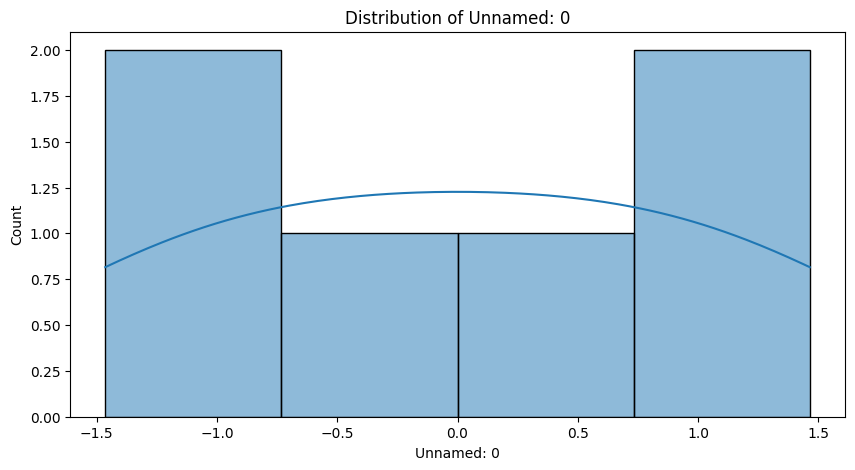

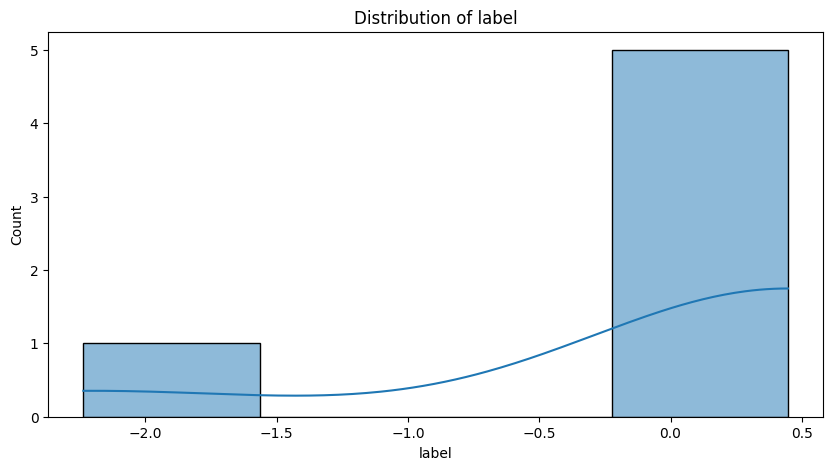

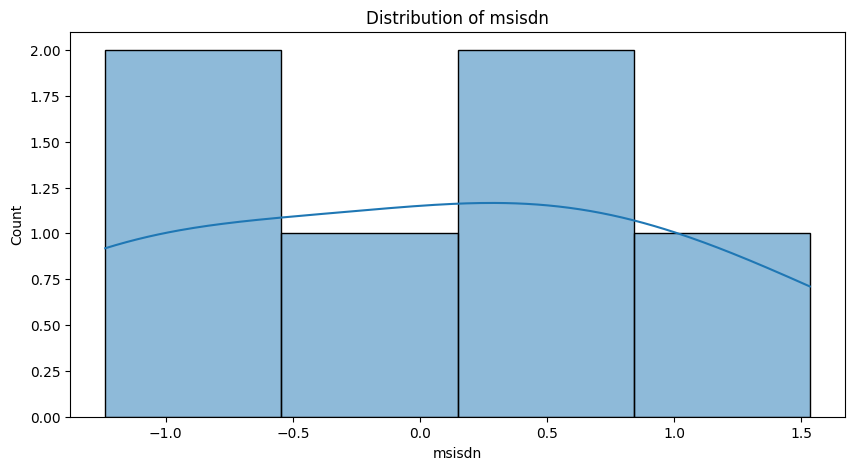

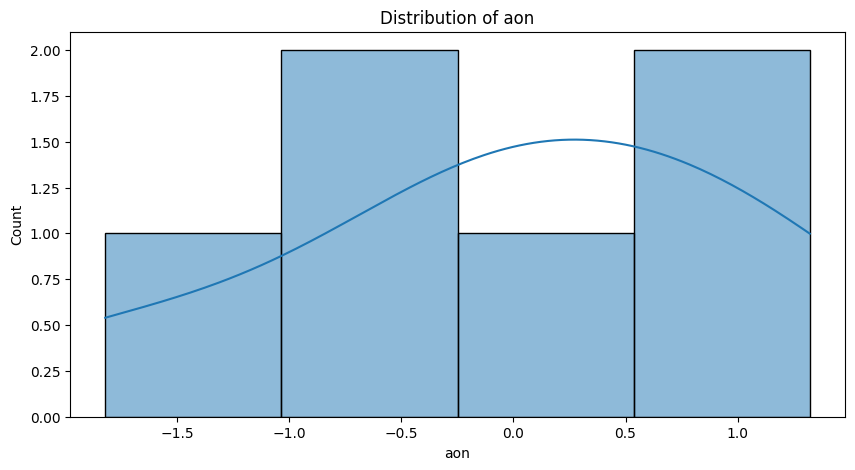

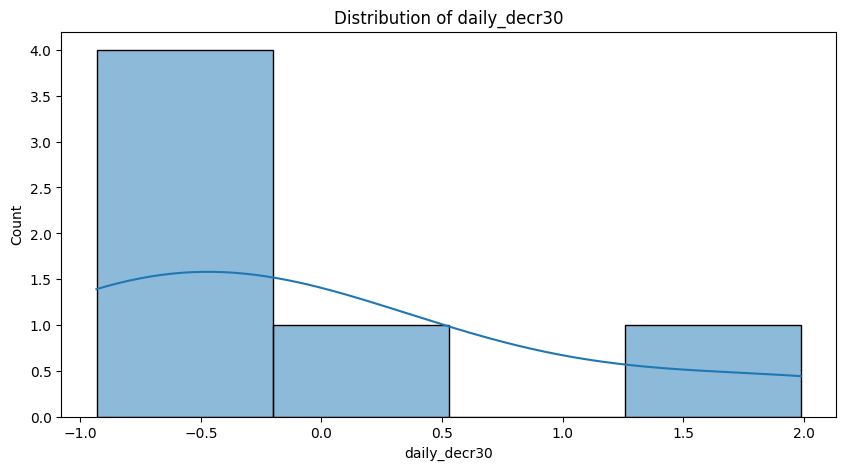

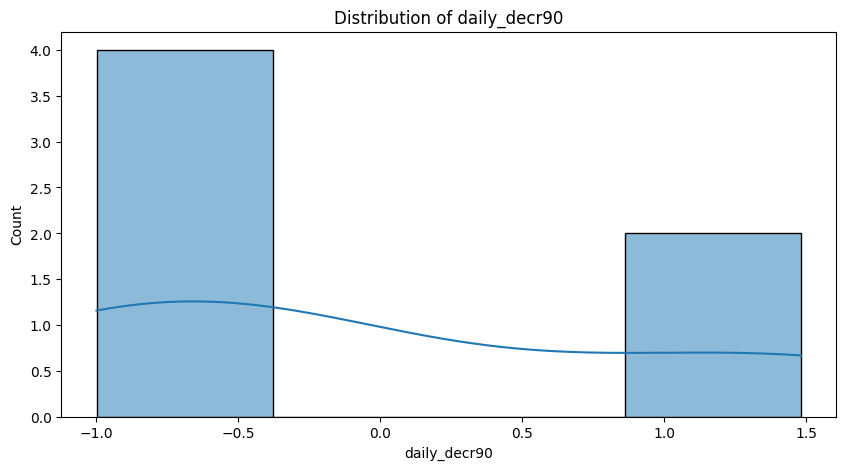

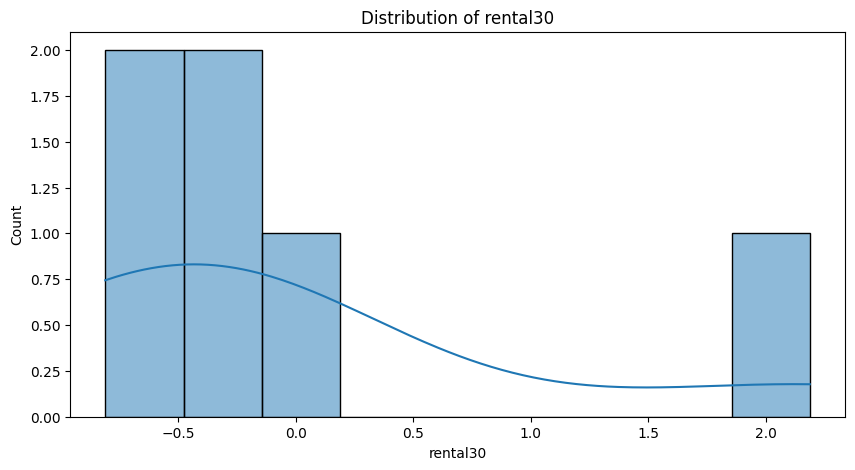

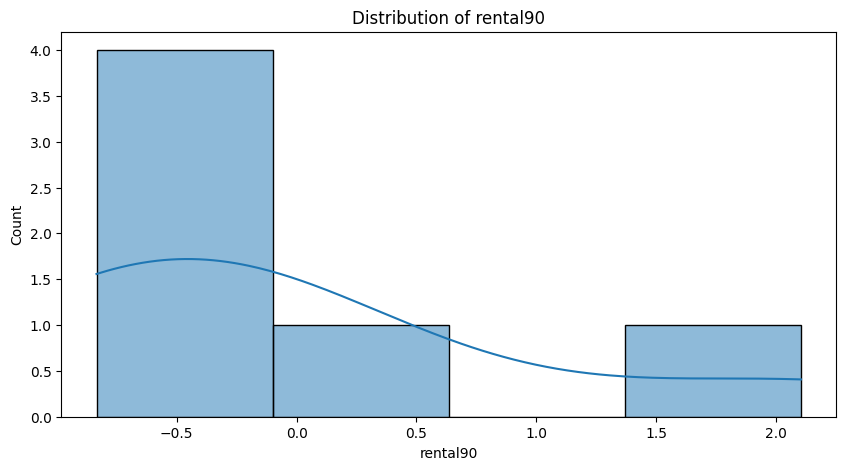

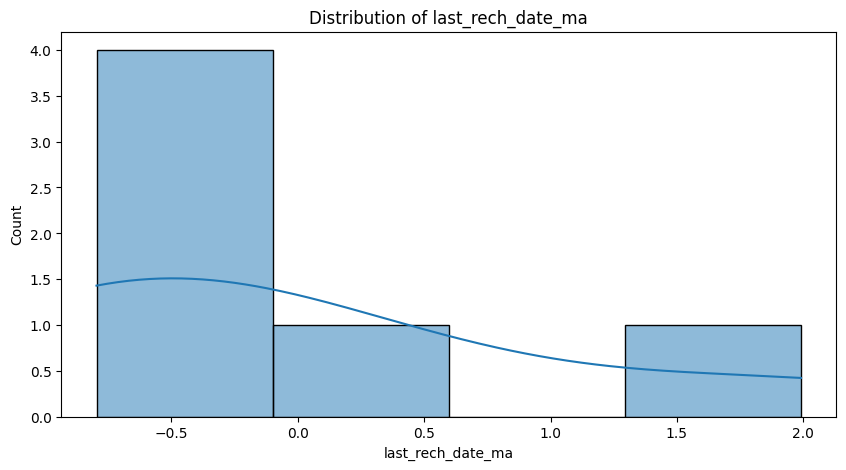

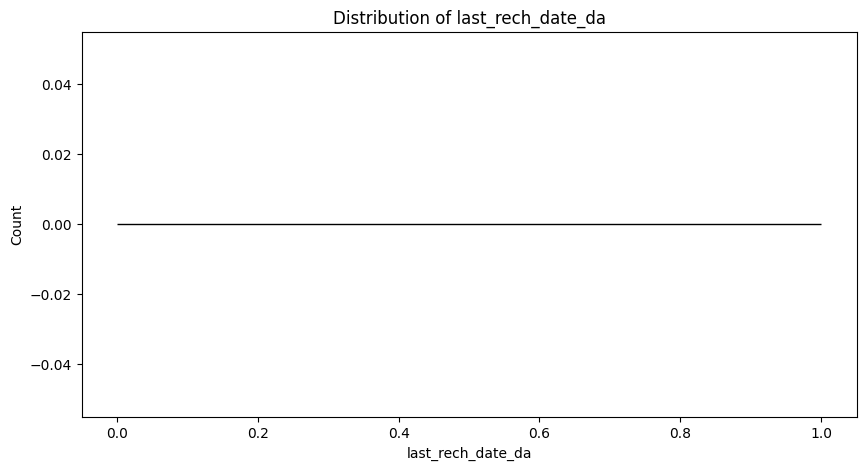

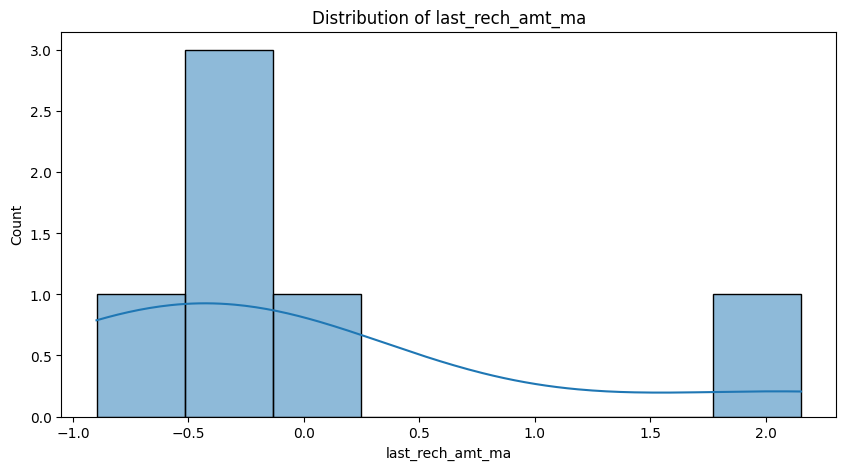

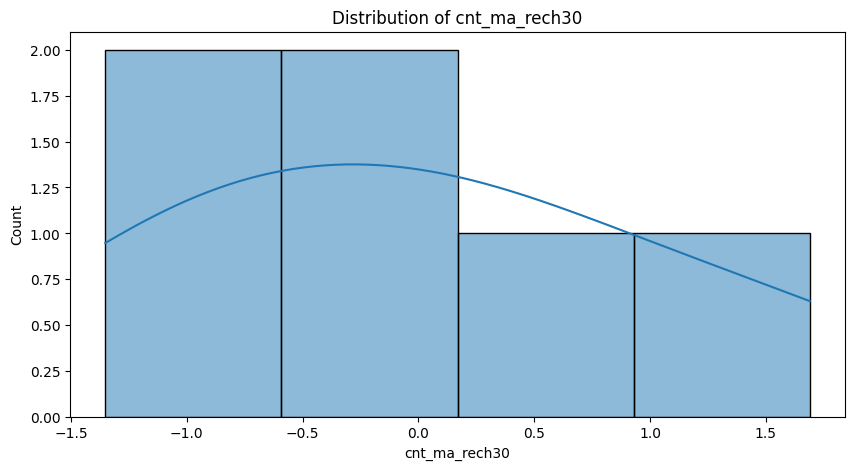

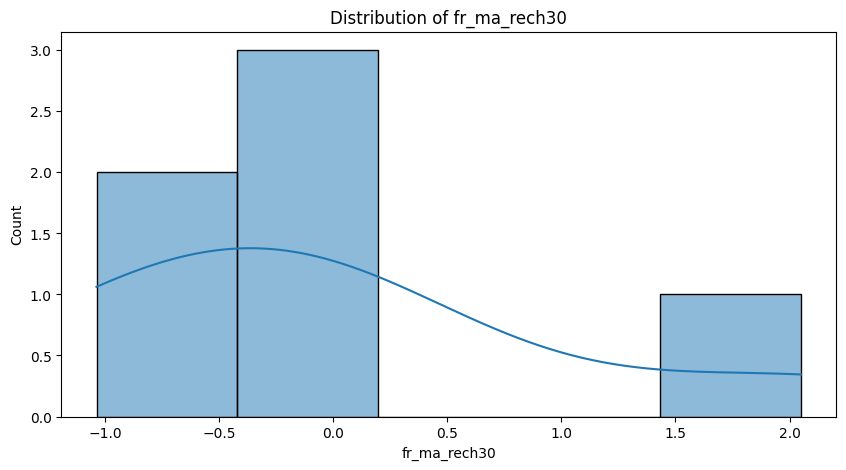

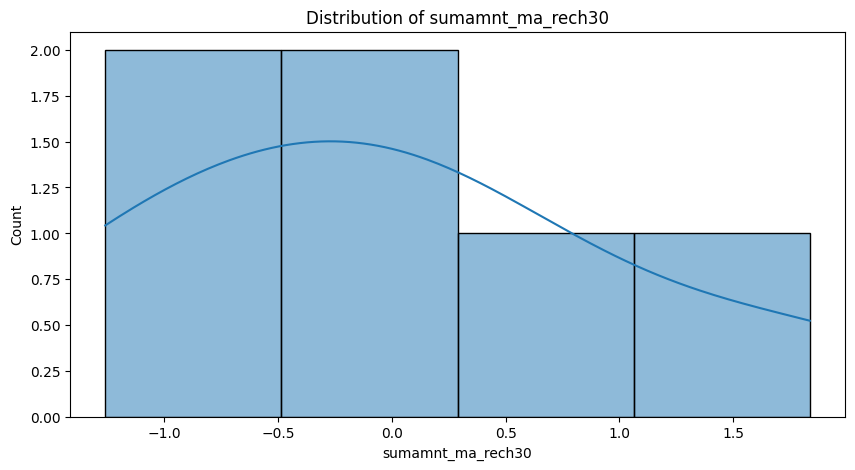

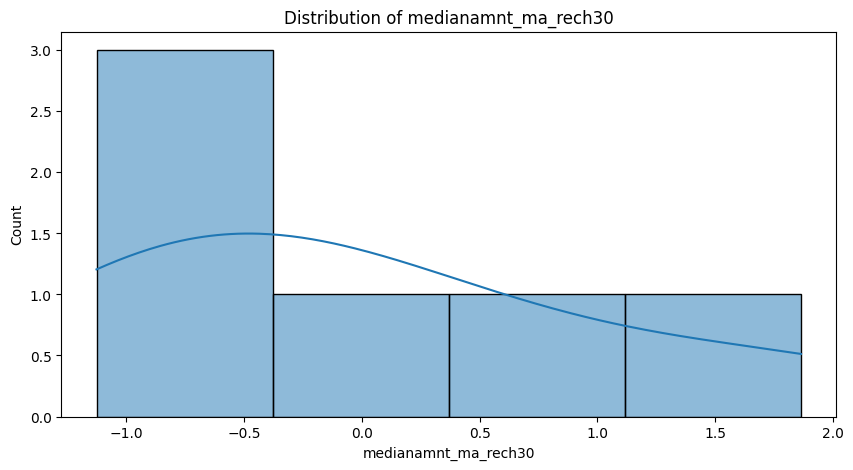

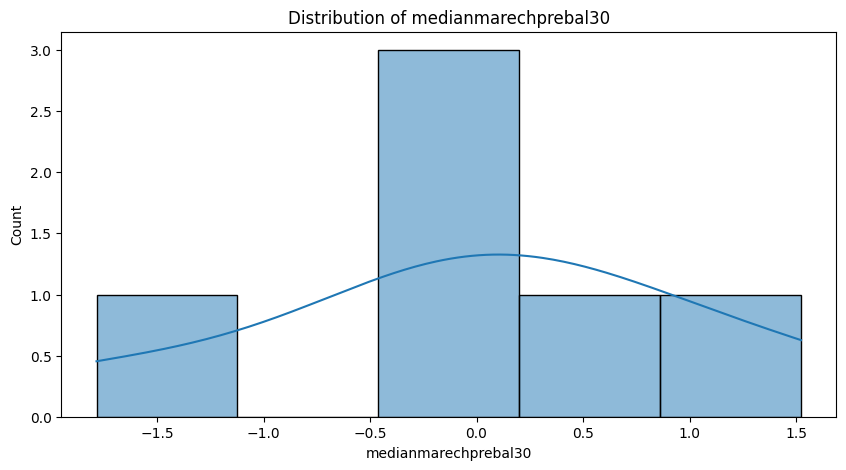

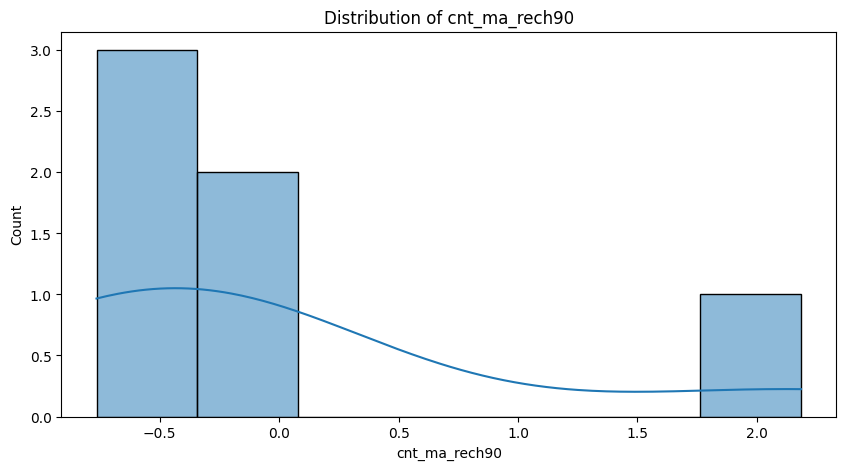

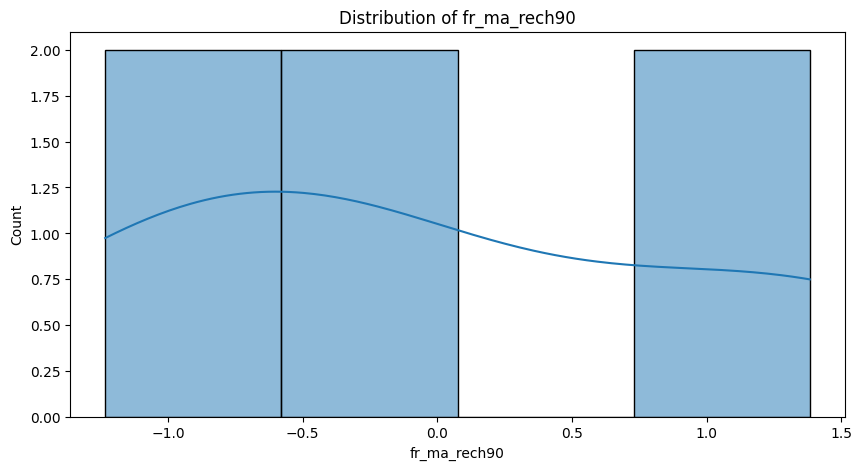

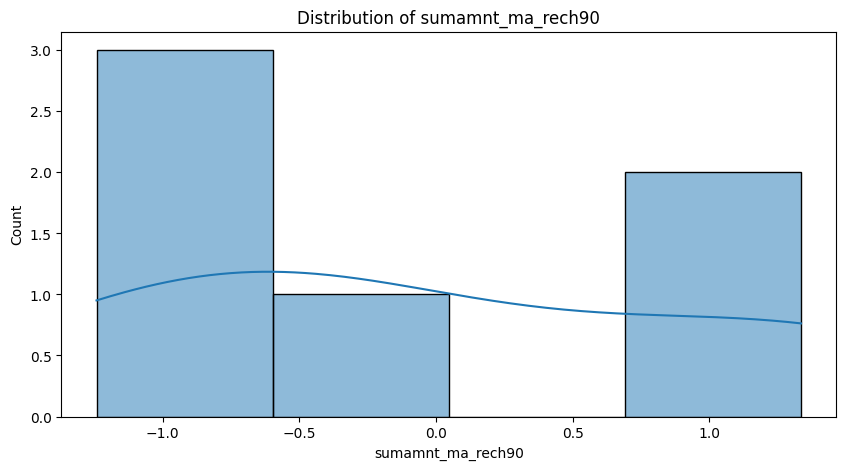

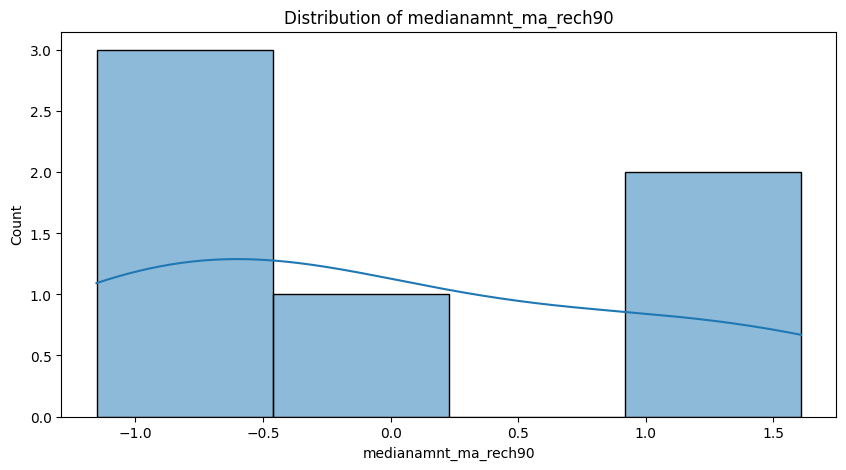

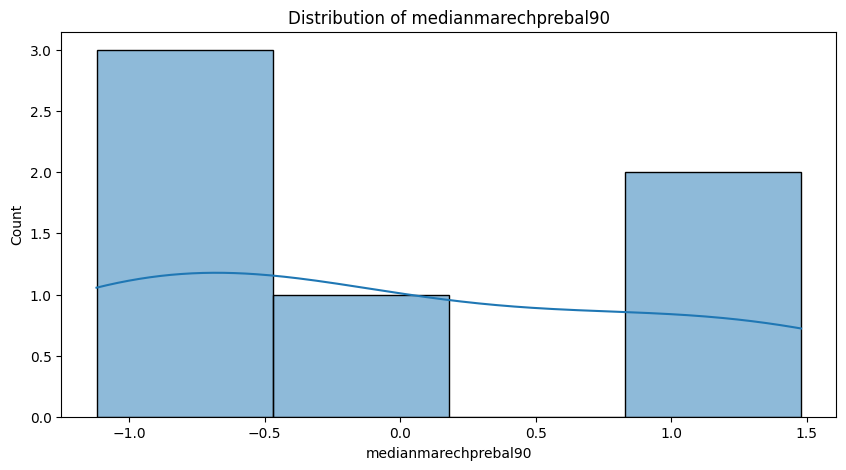

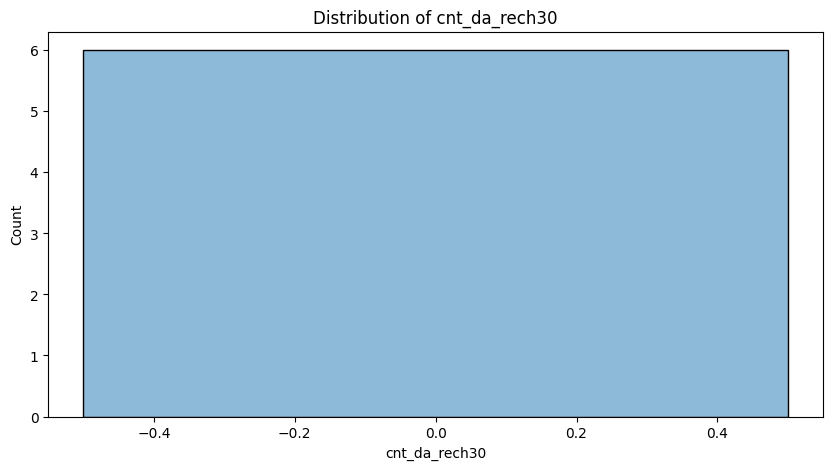

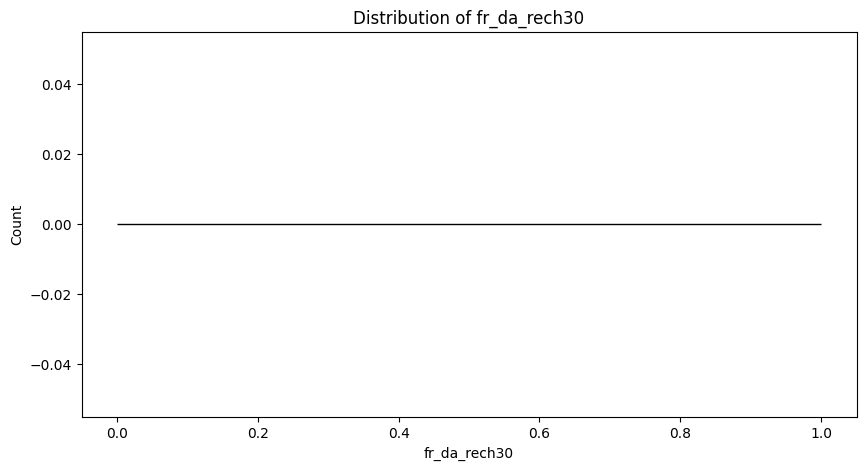

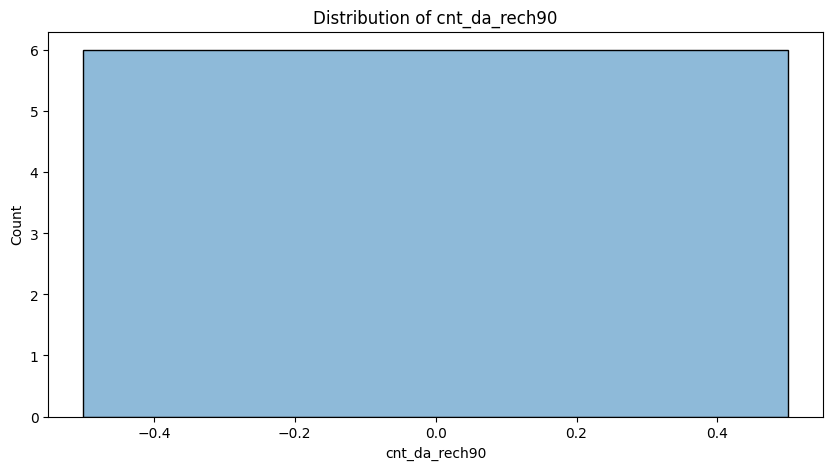

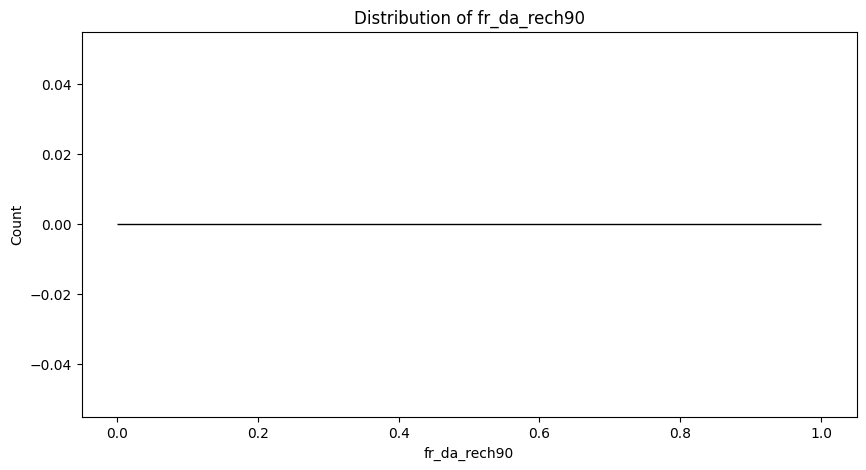

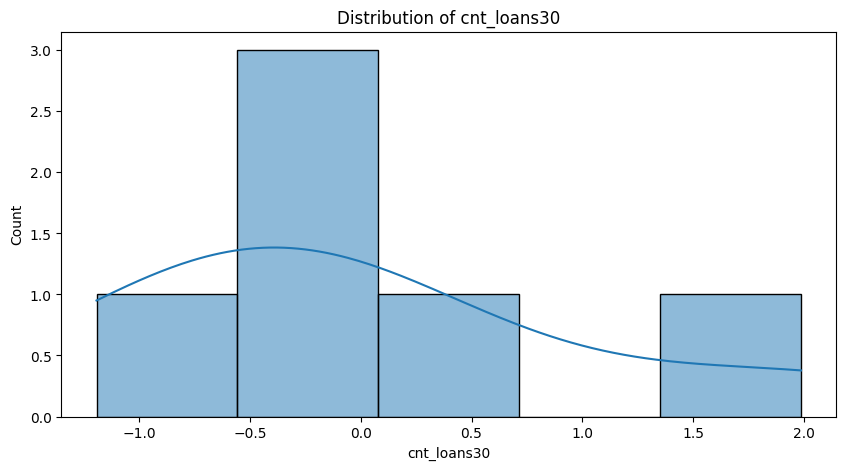

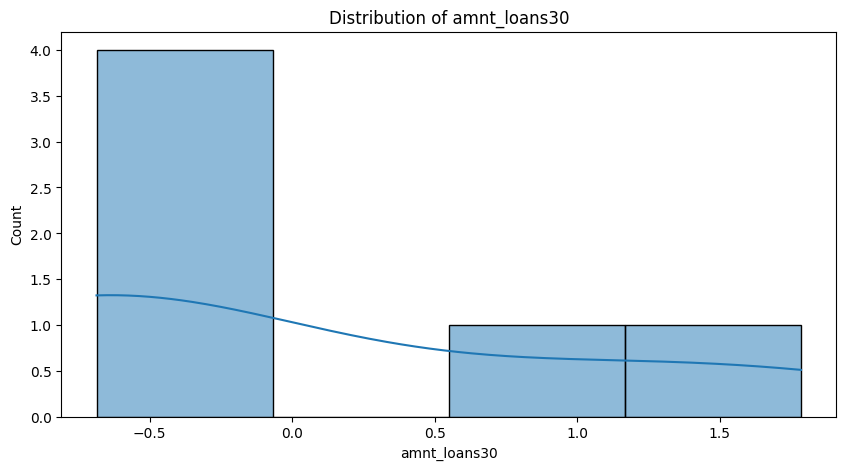

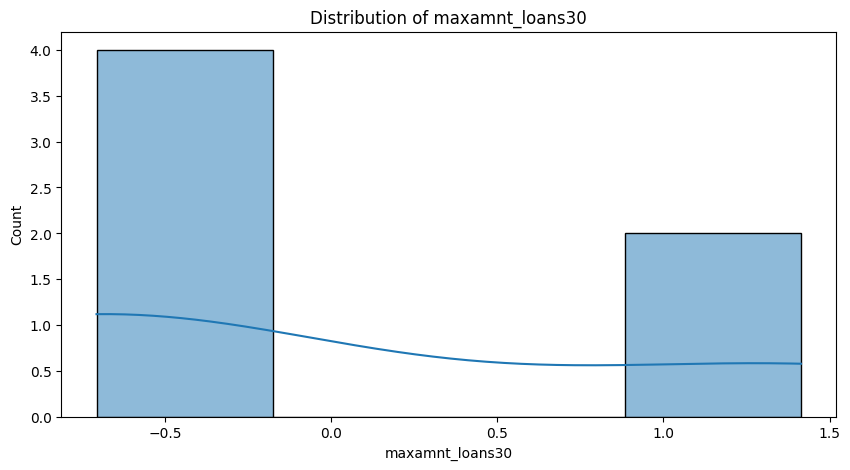

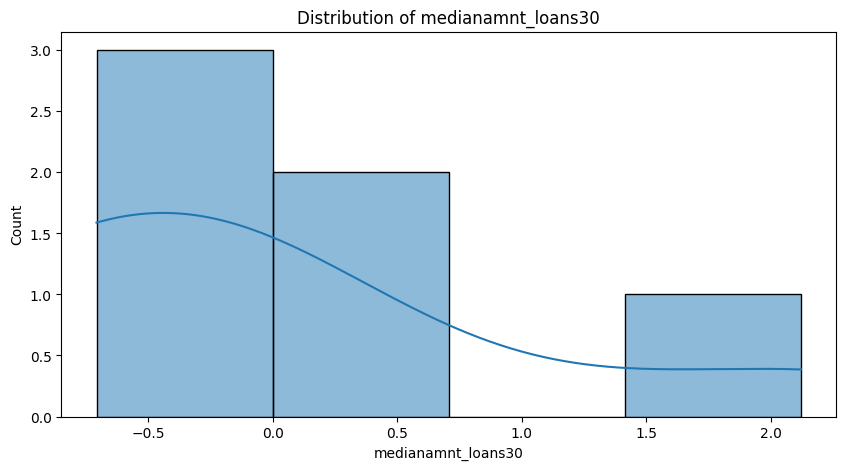

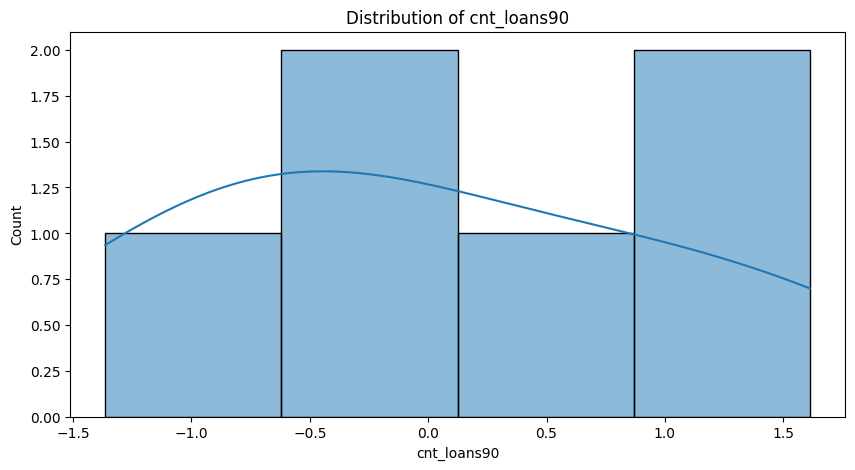

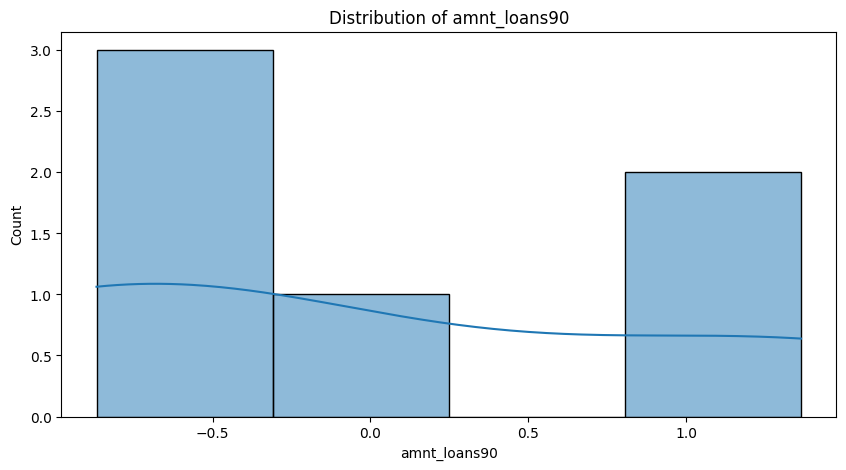

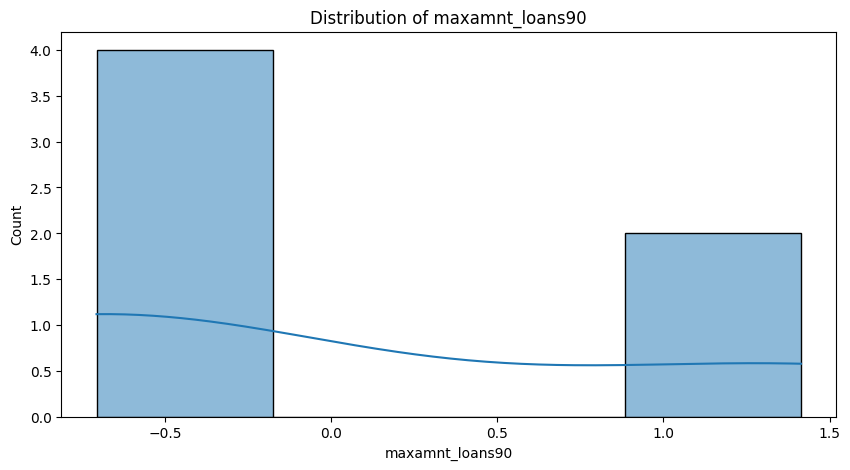

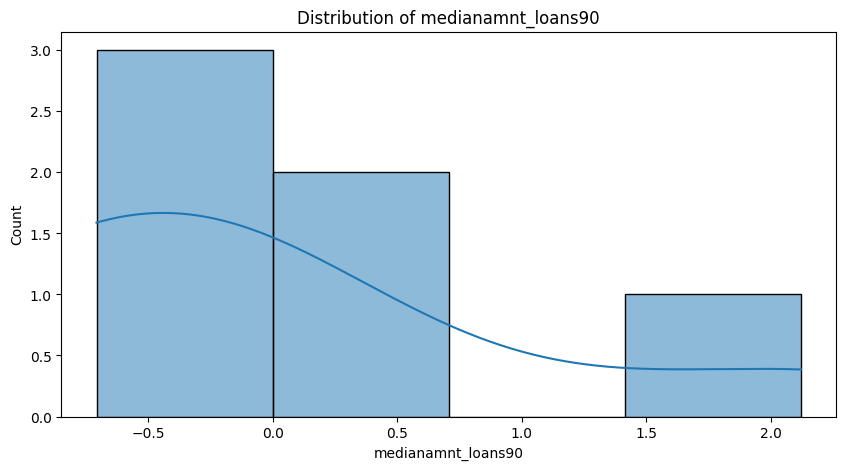

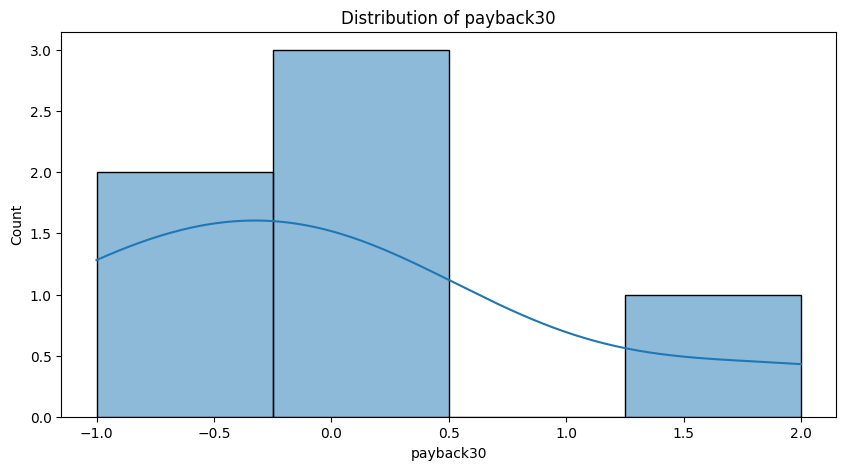

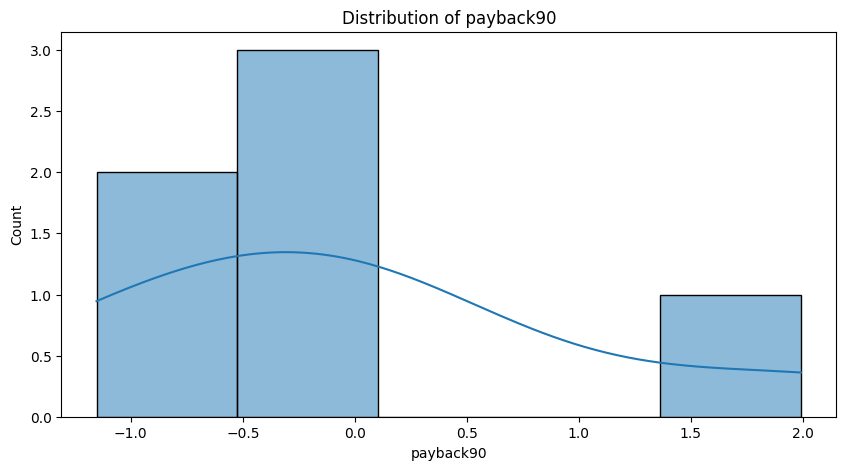

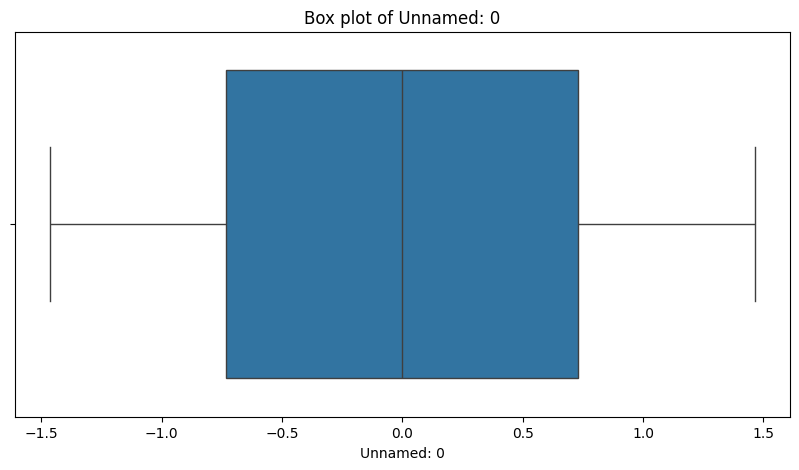

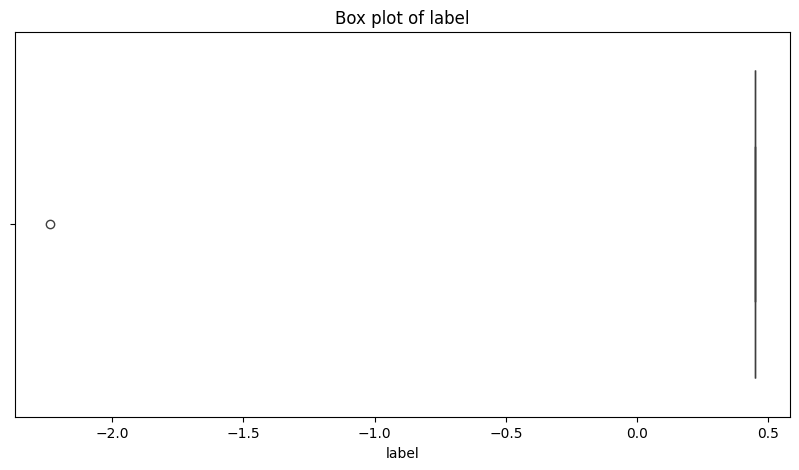

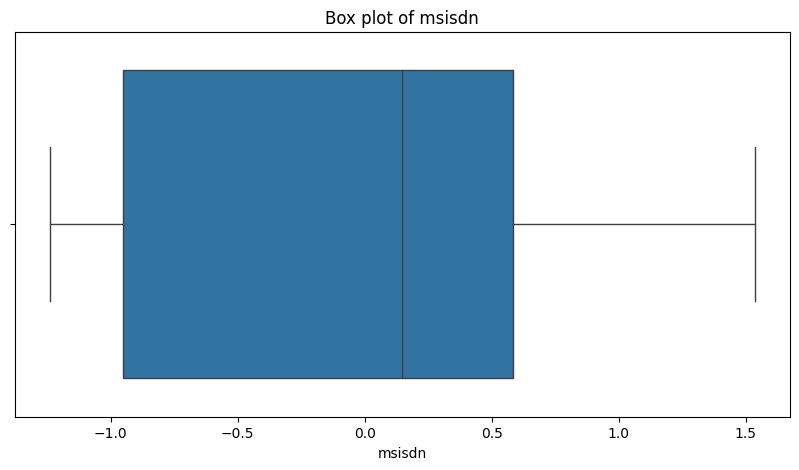

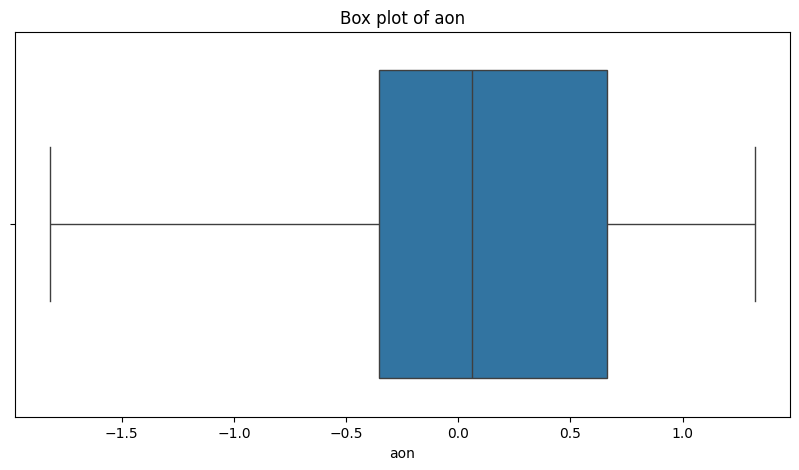

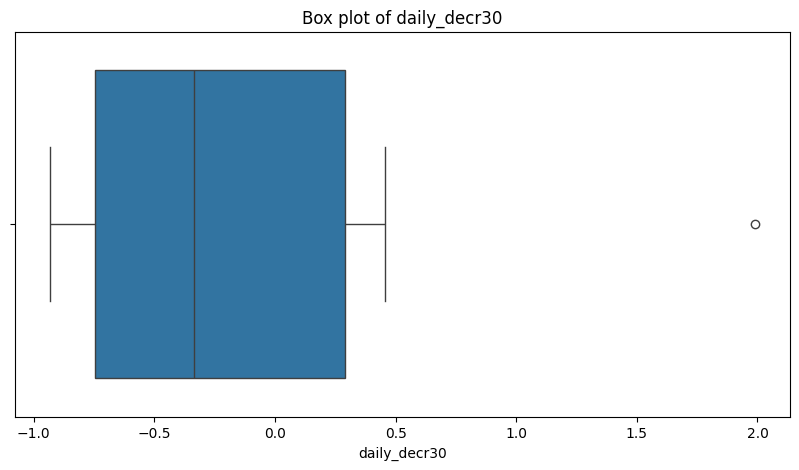

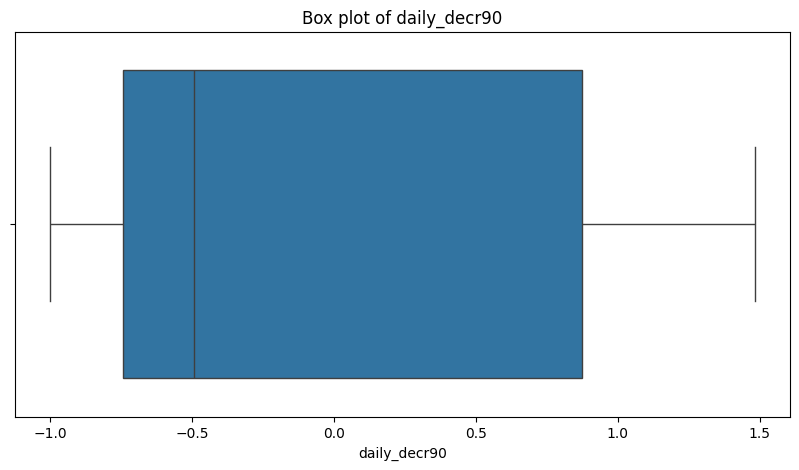

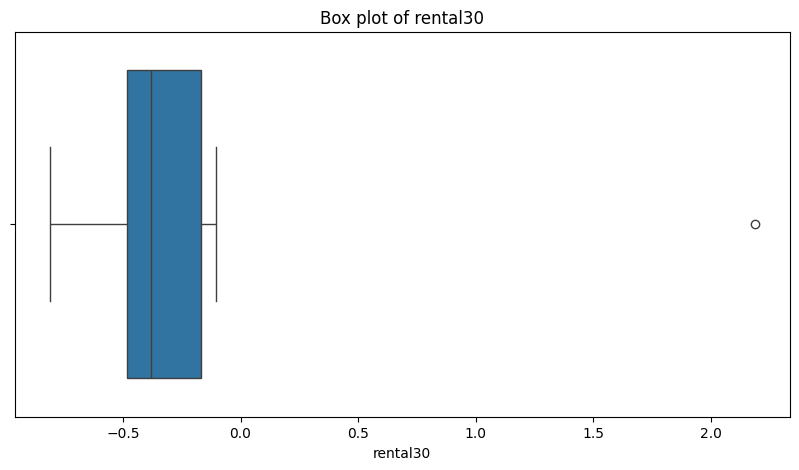

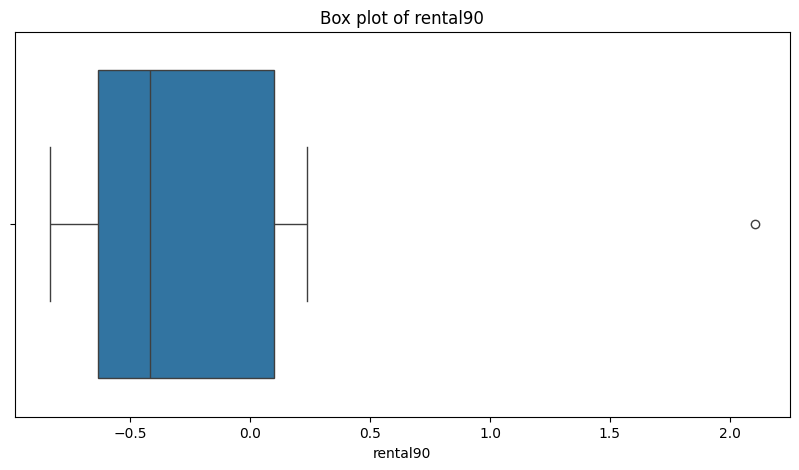

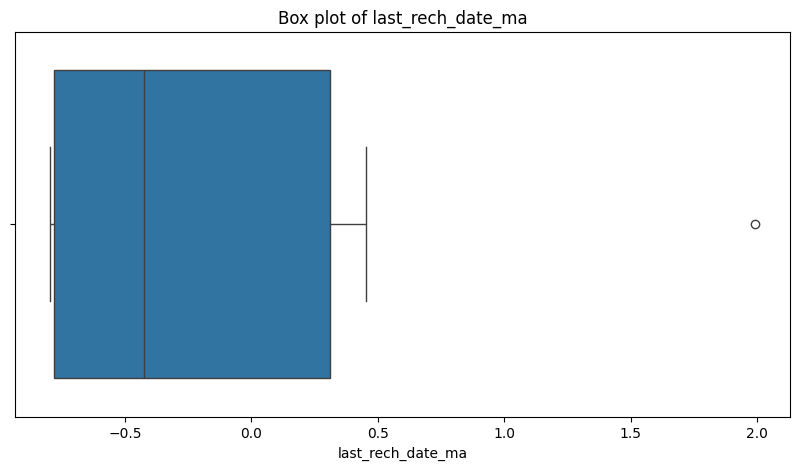

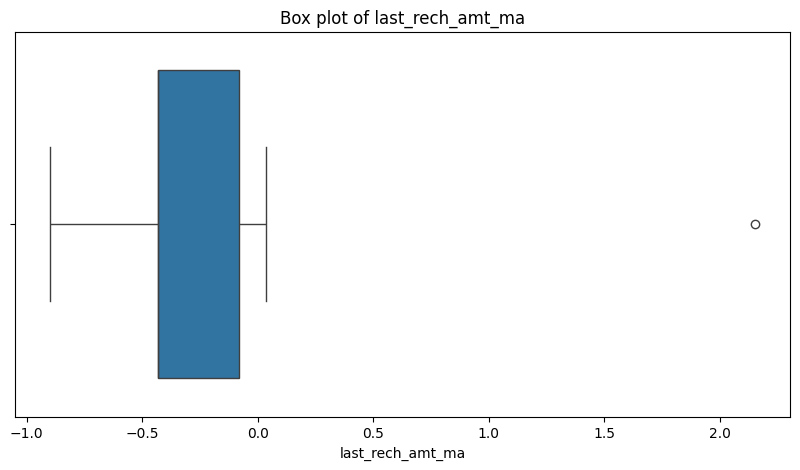

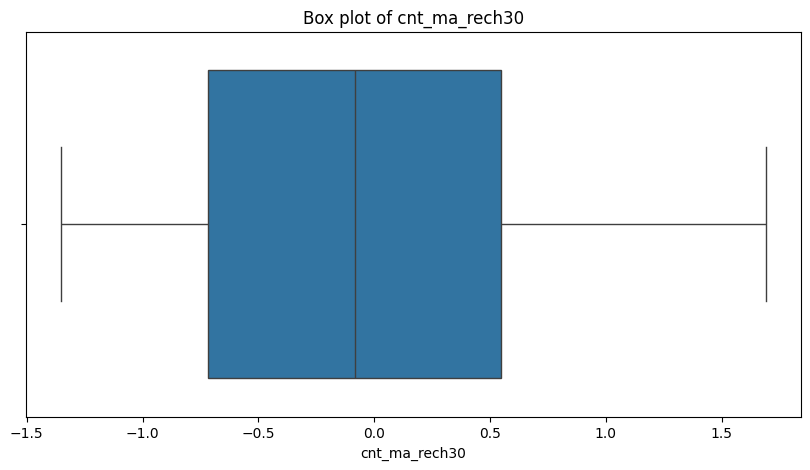

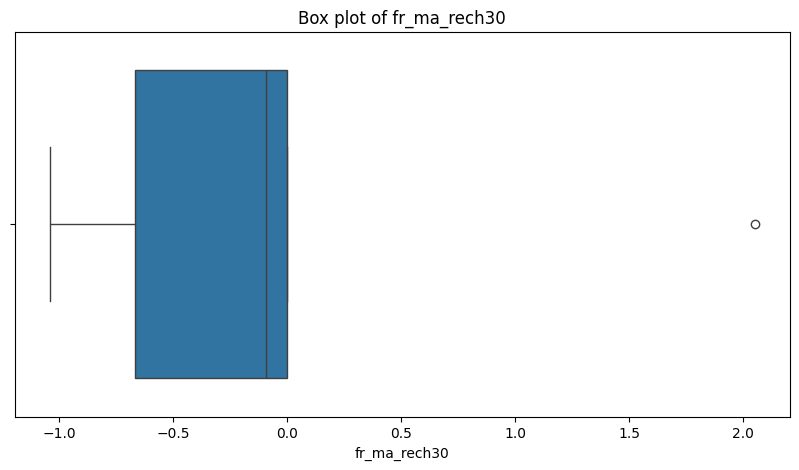

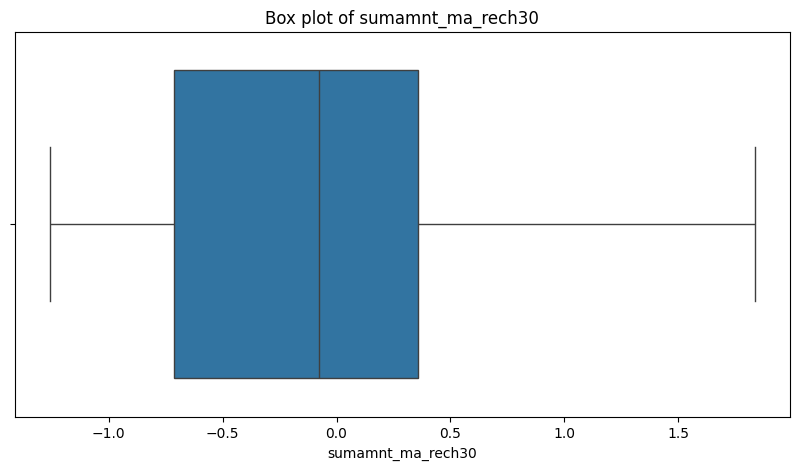

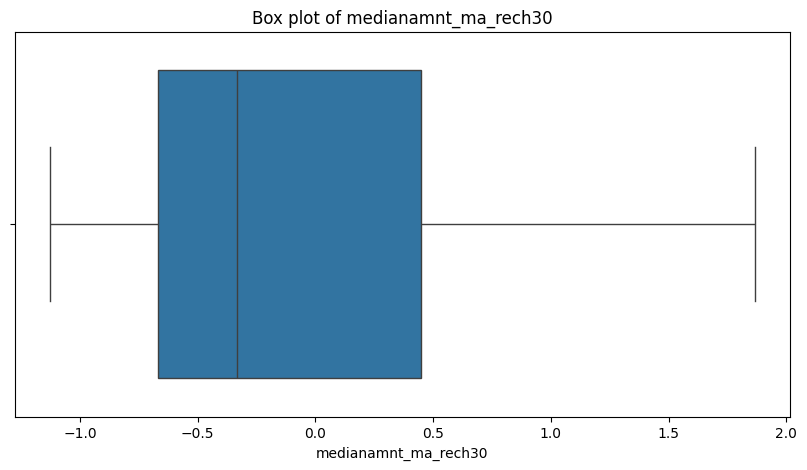

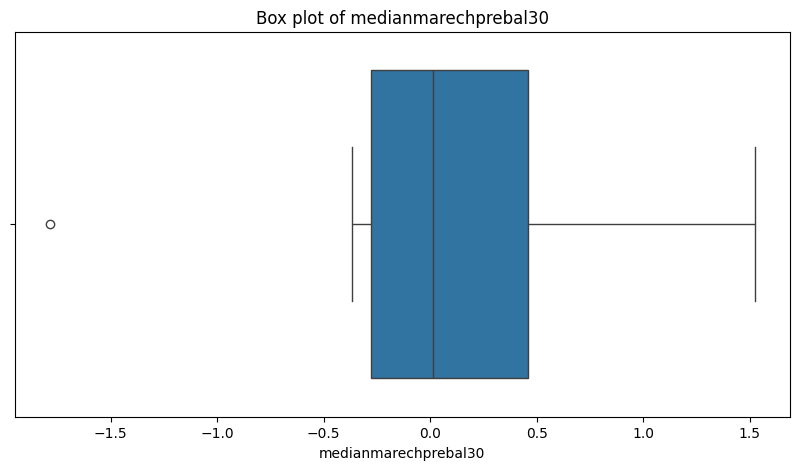

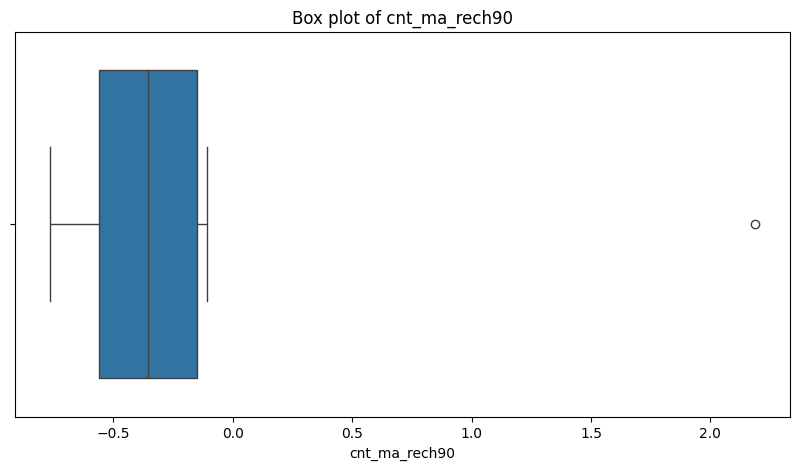

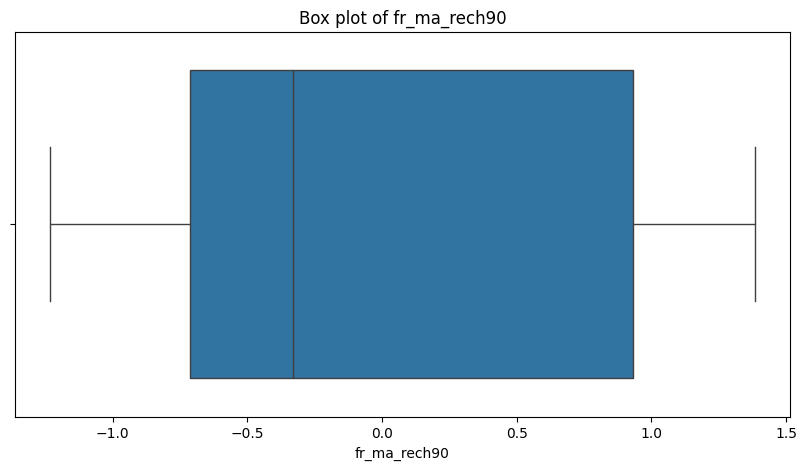

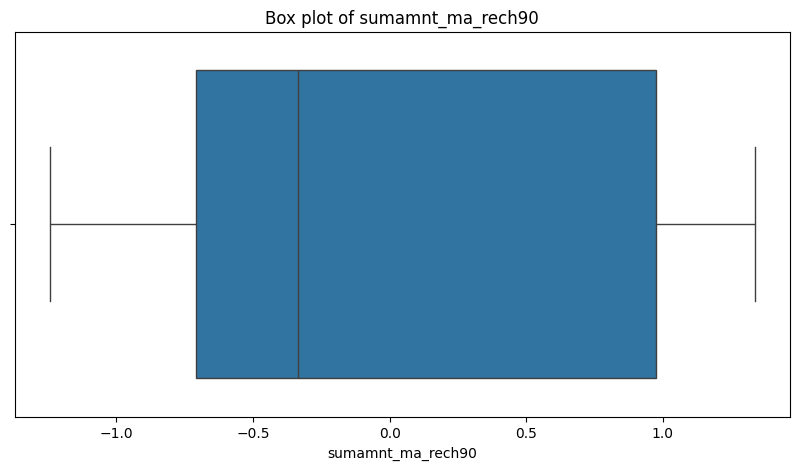

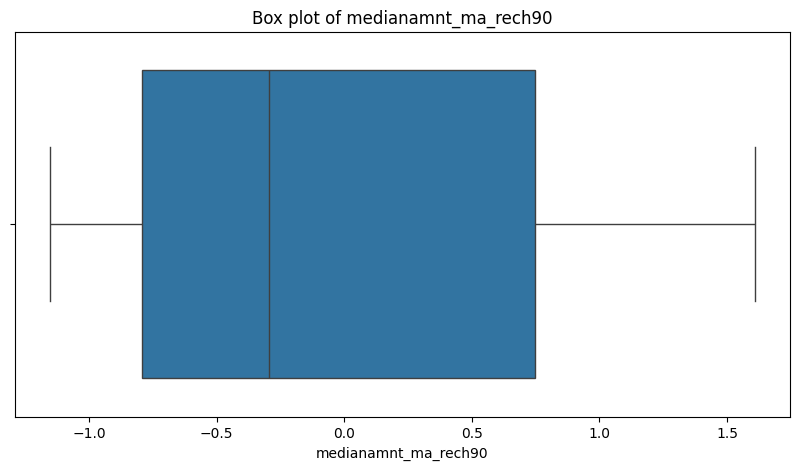

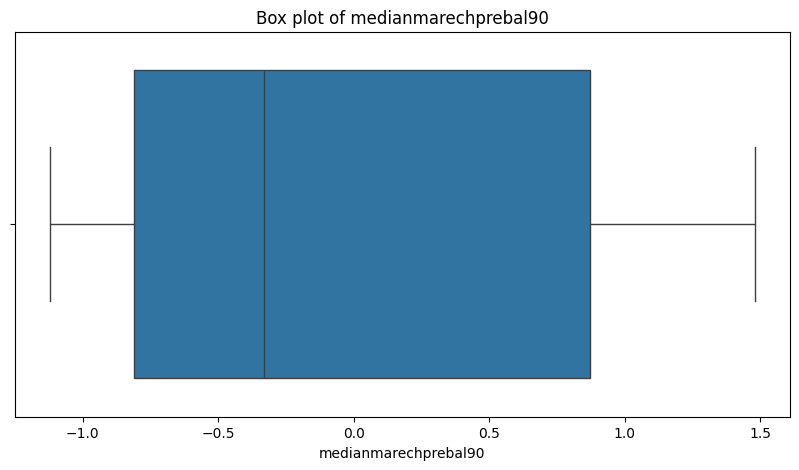

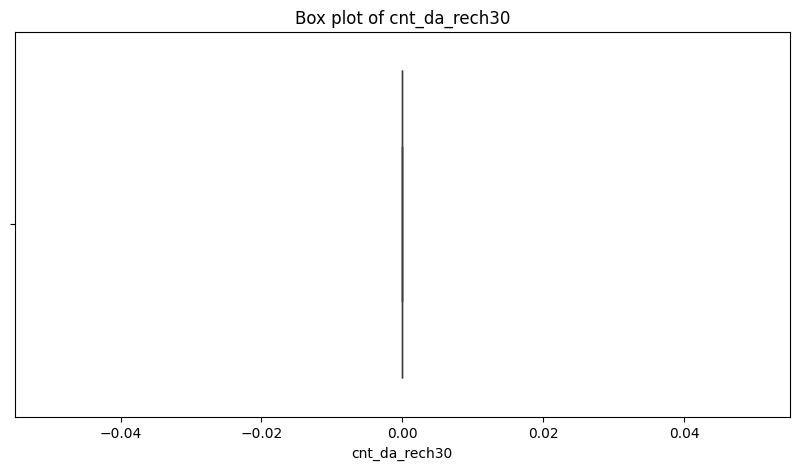

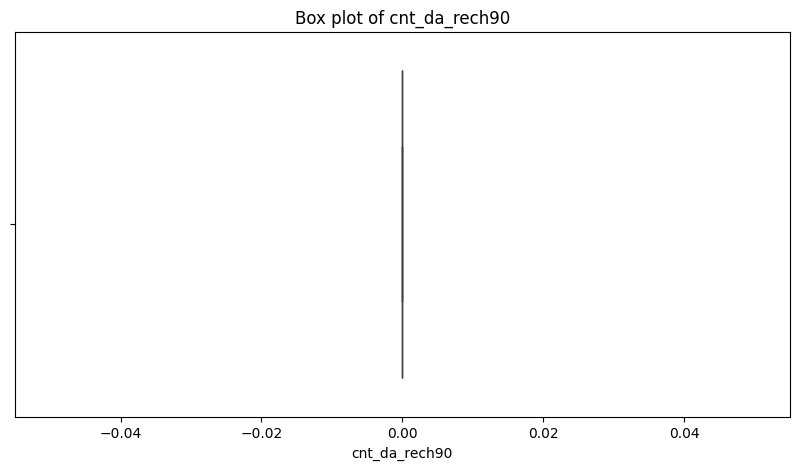

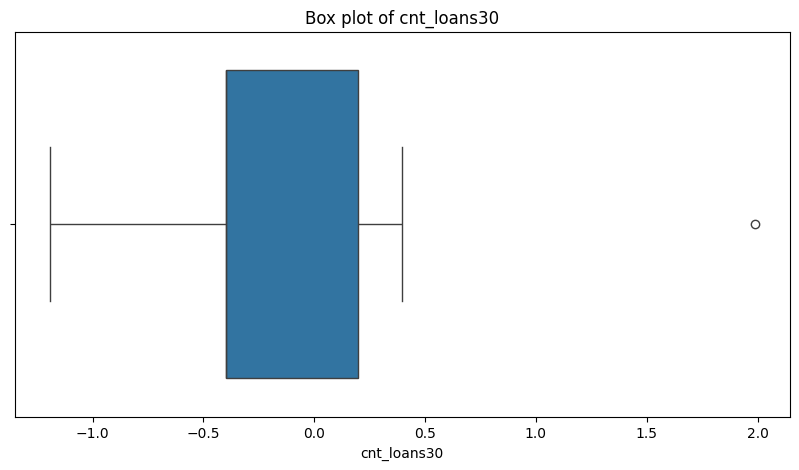

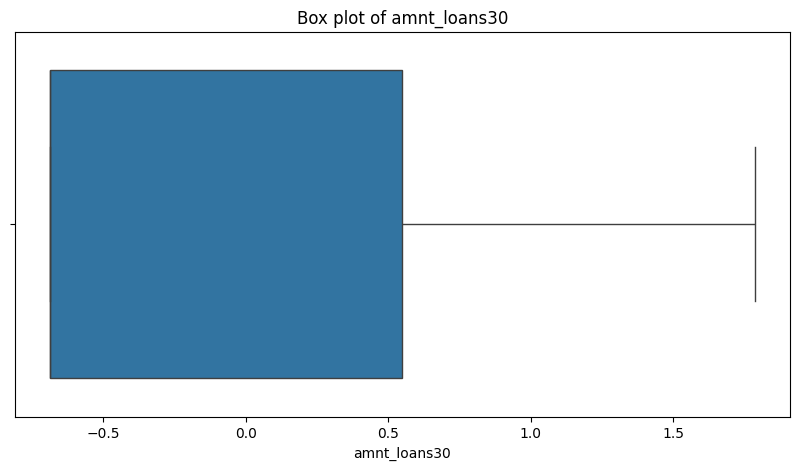

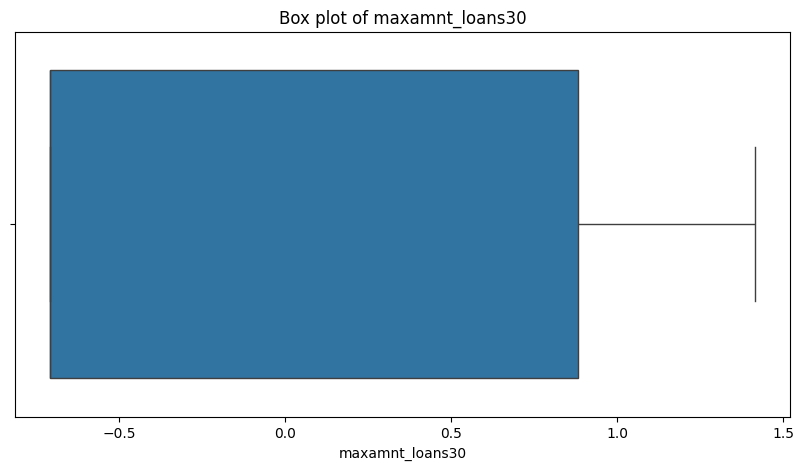

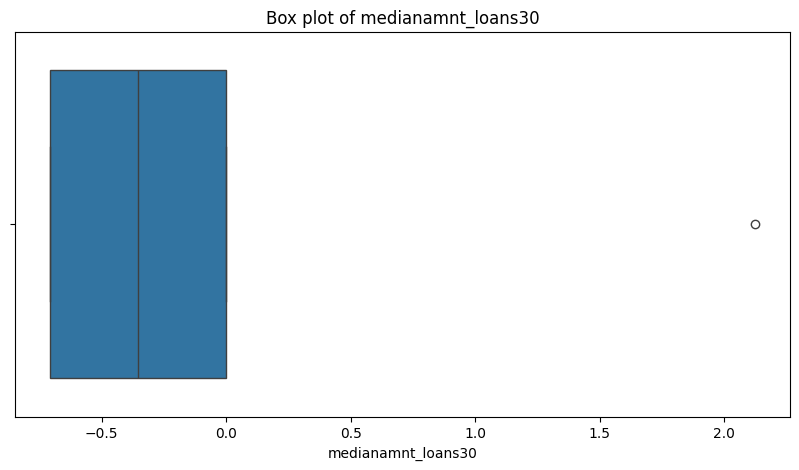

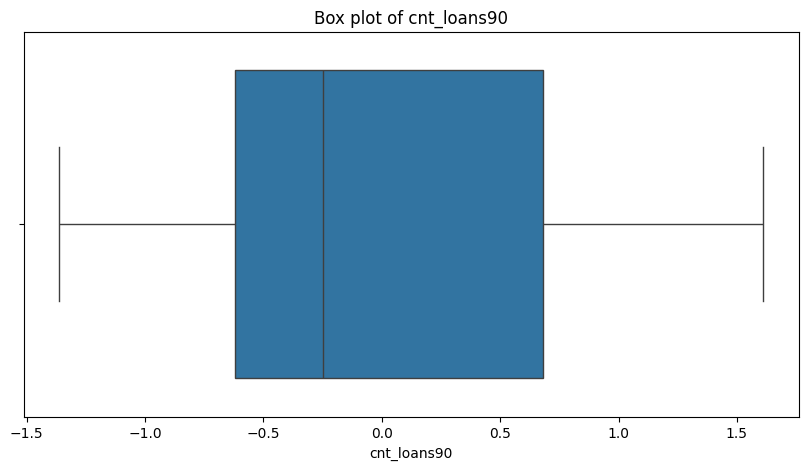

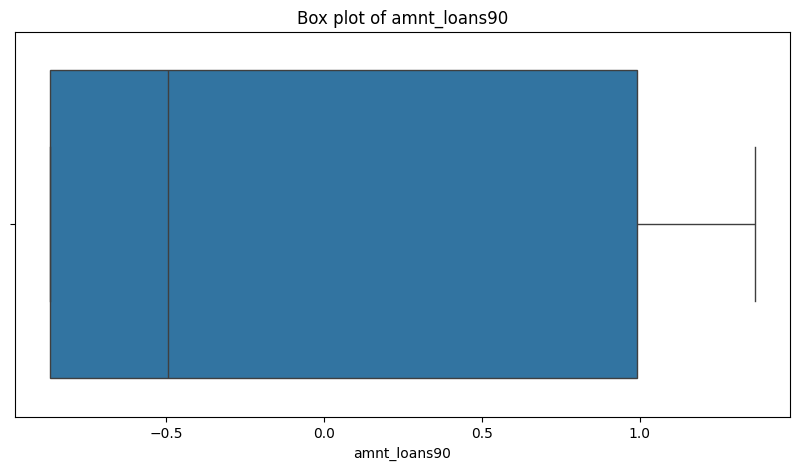

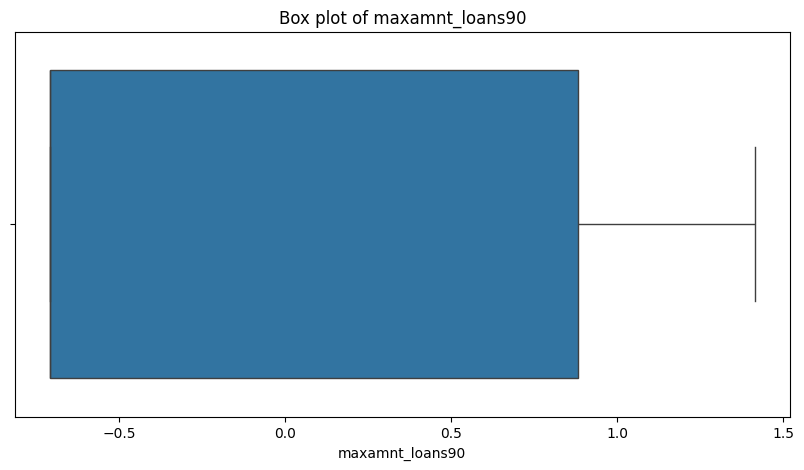

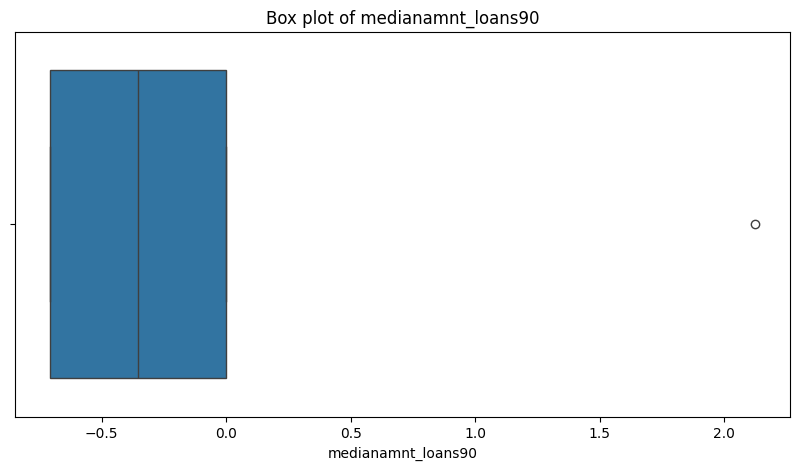

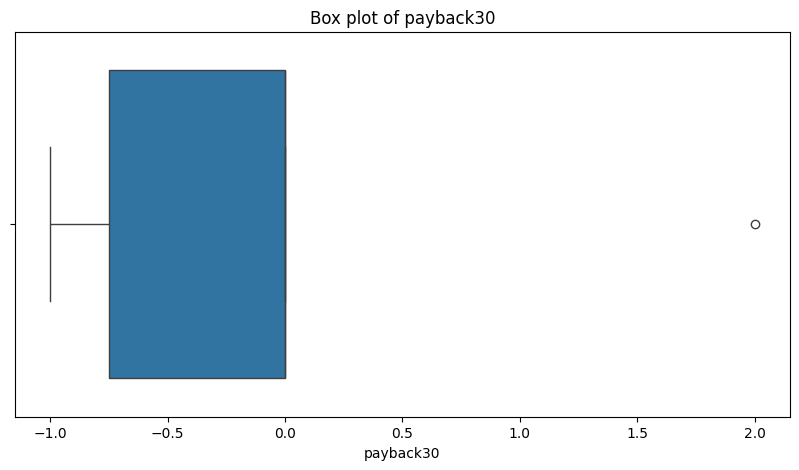

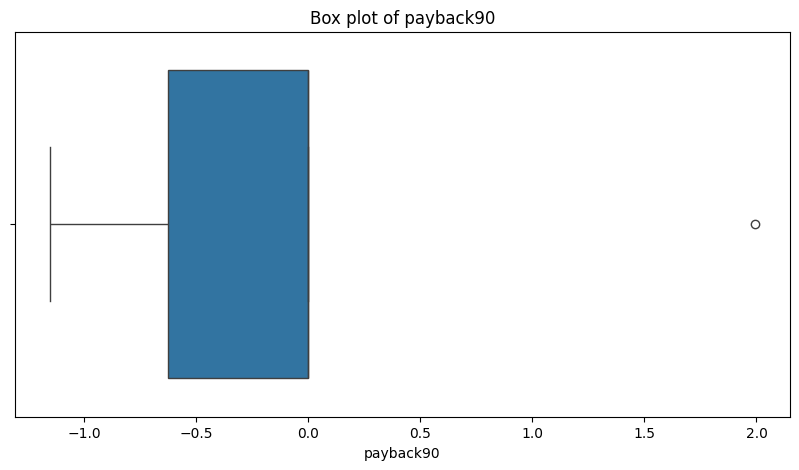

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis of numerical features
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box plots to identify outliers
# Ensure we have non-NaN values for plotting
valid_num_cols = data_encoded[num_cols].dropna(axis=1, how='all').columns

for col in valid_num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data_encoded[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.show()


**BIVARATE ANALYSIS**

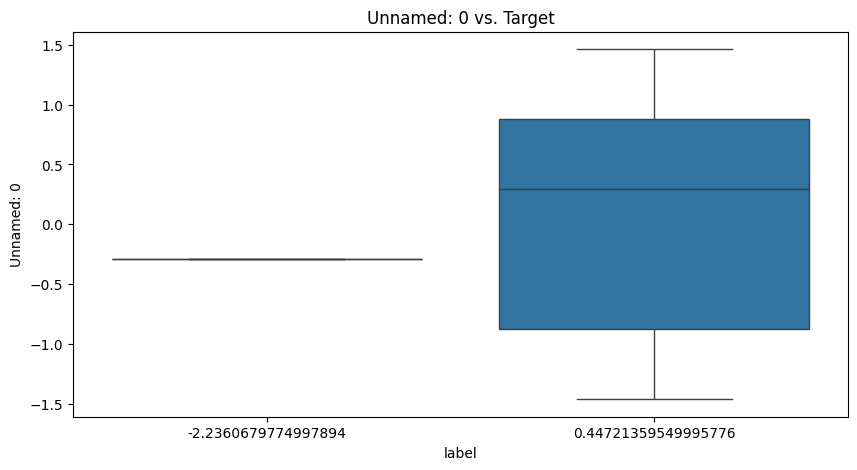

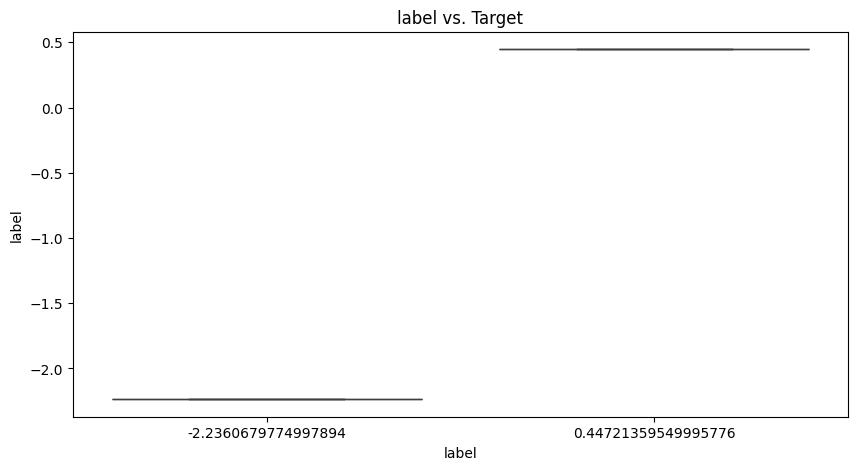

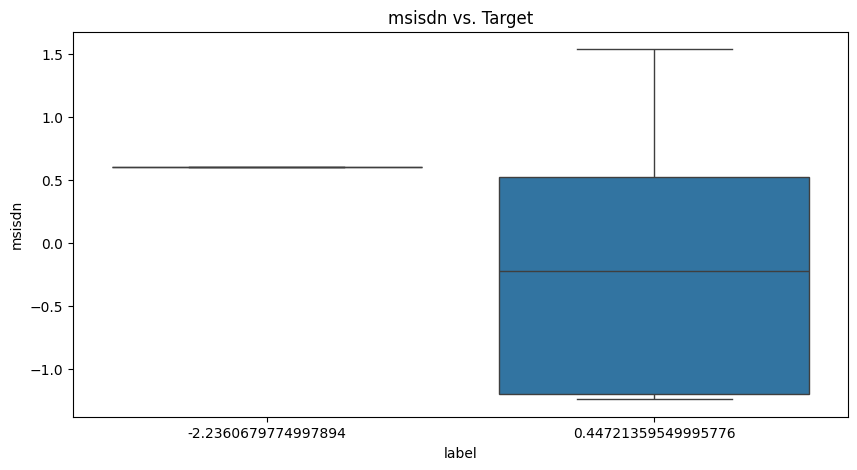

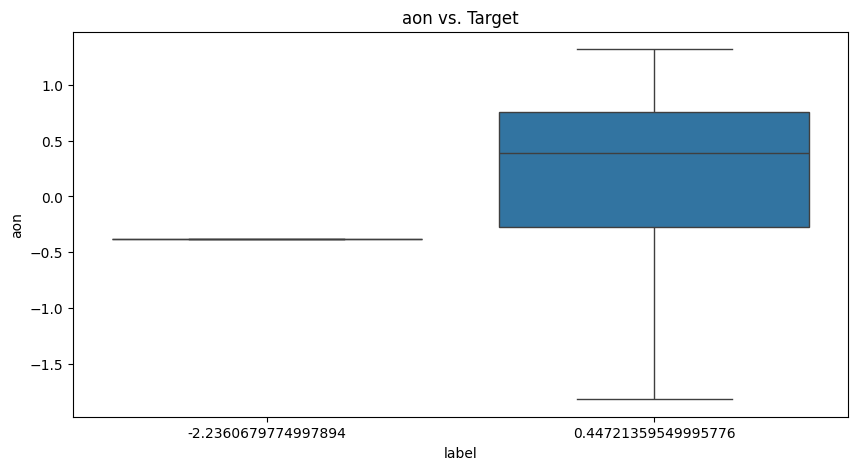

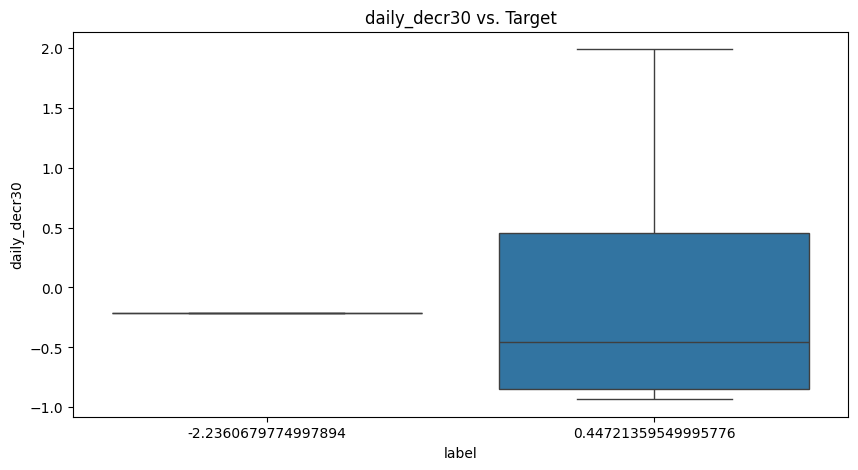

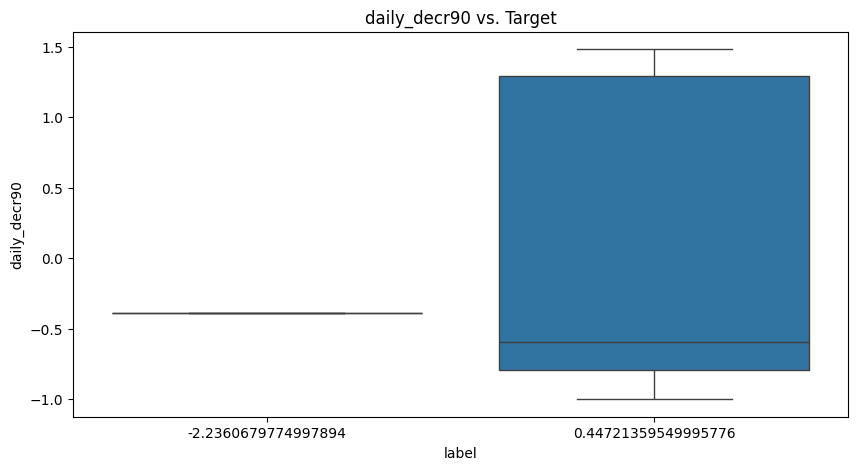

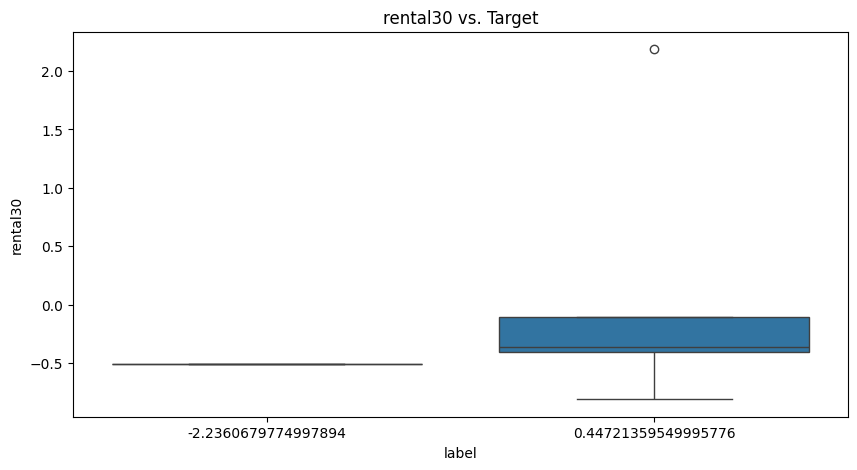

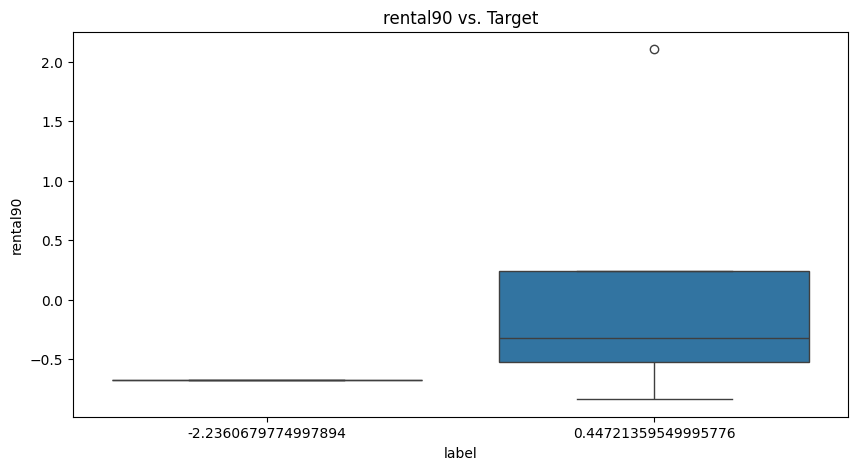

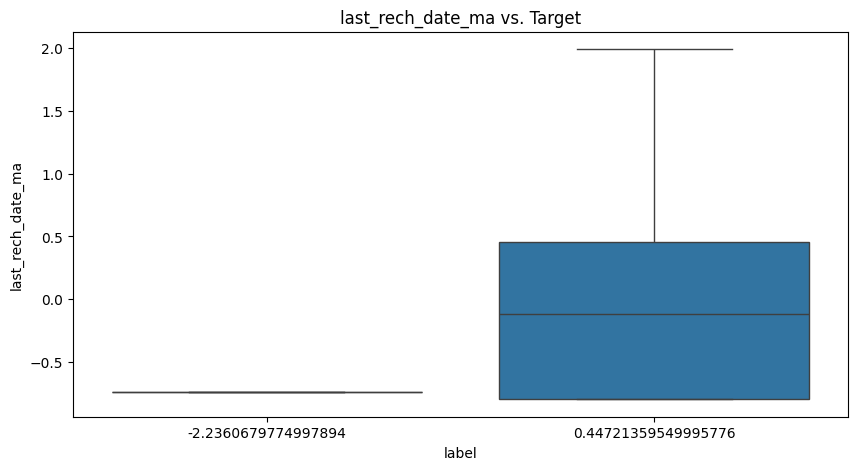

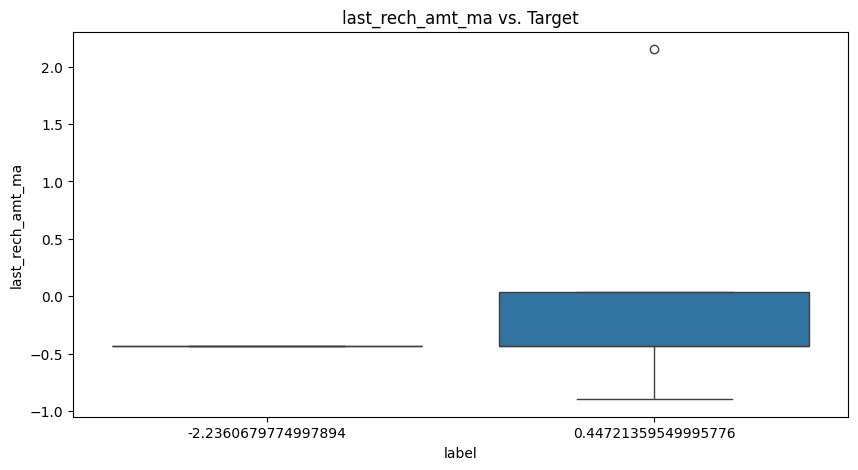

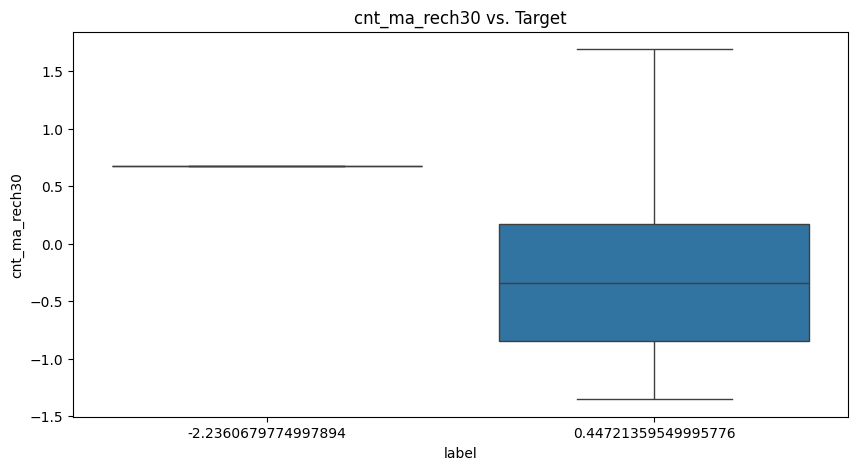

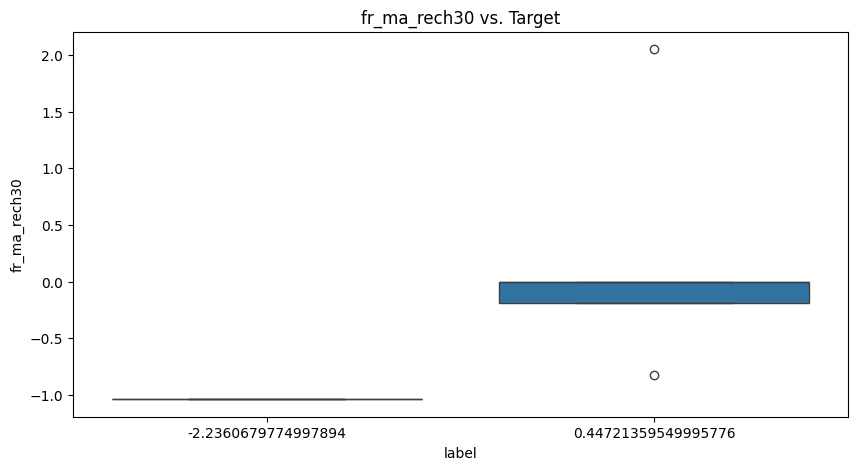

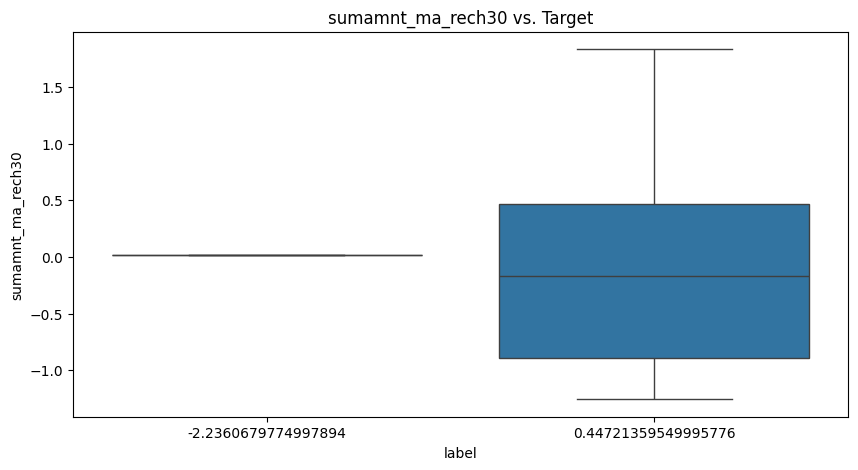

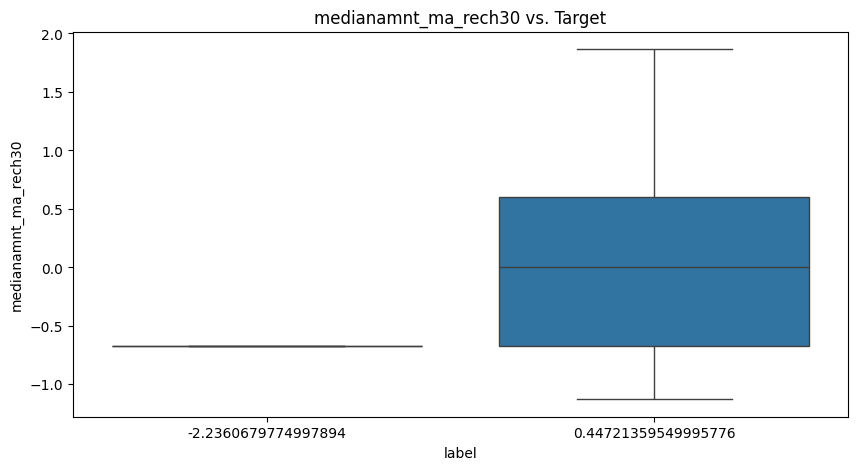

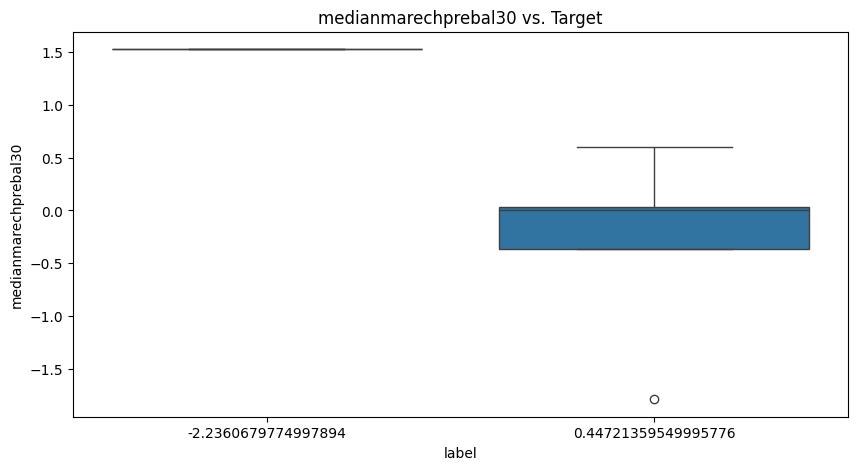

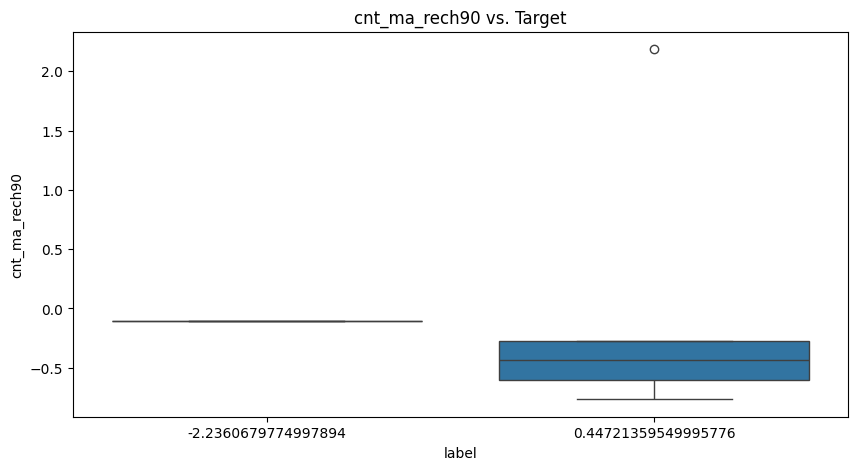

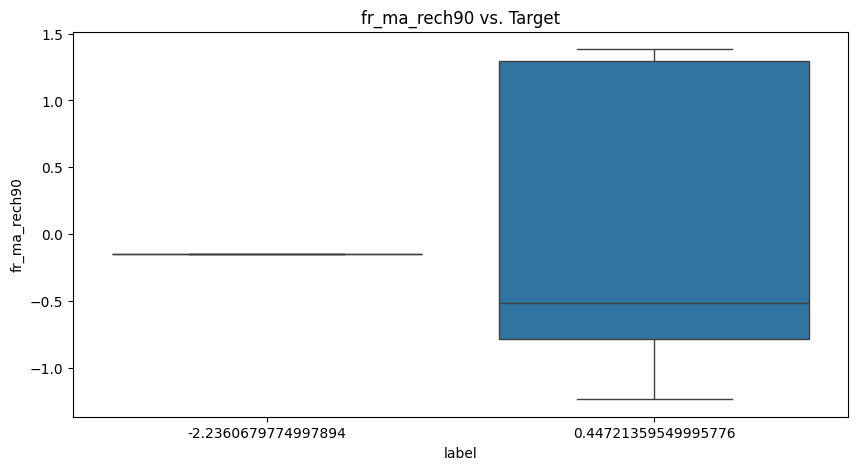

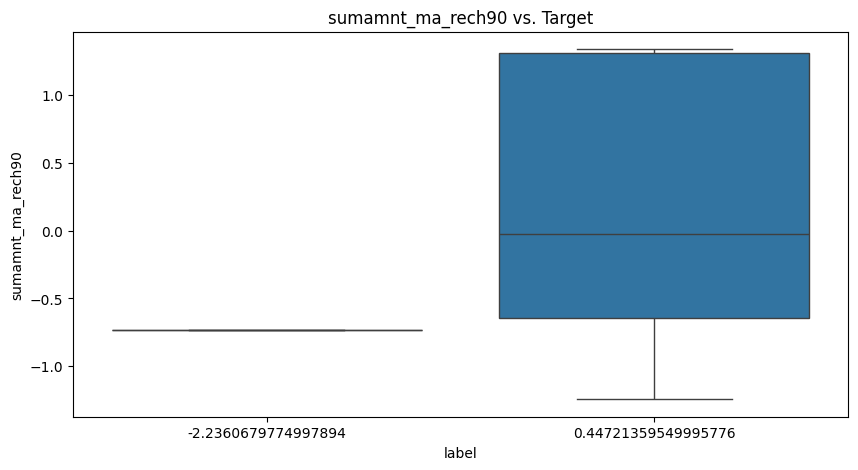

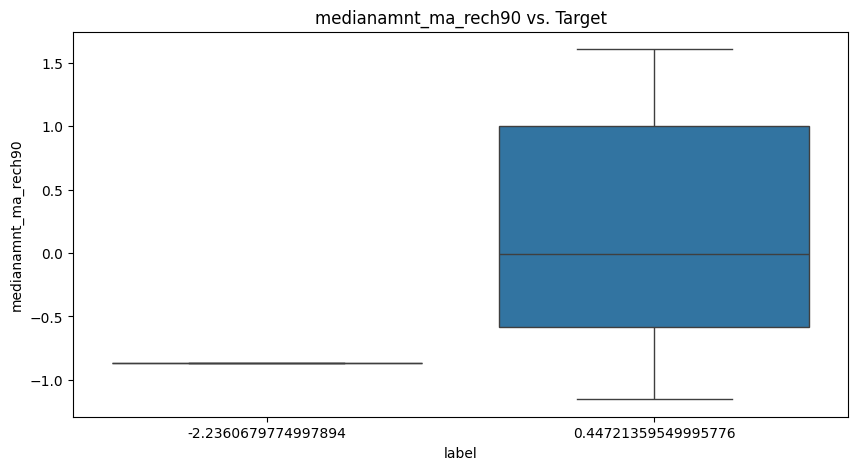

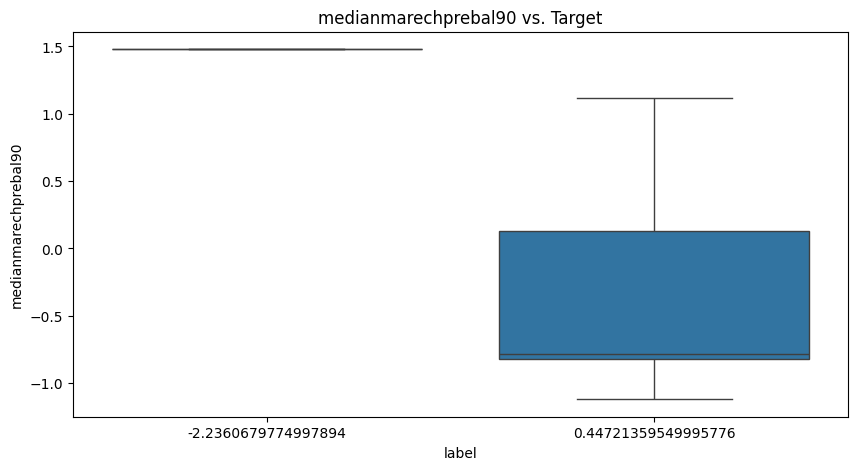

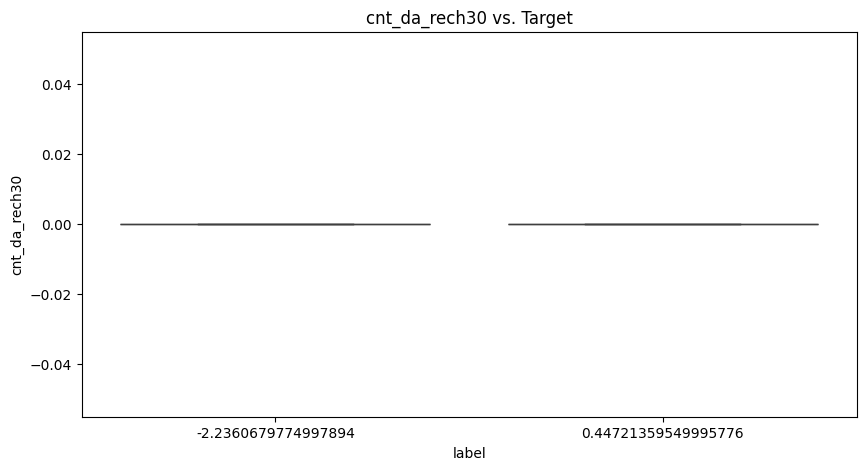

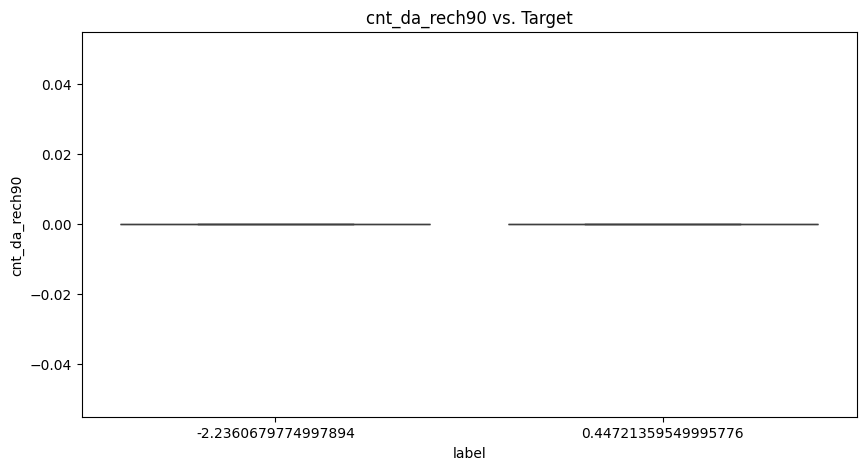

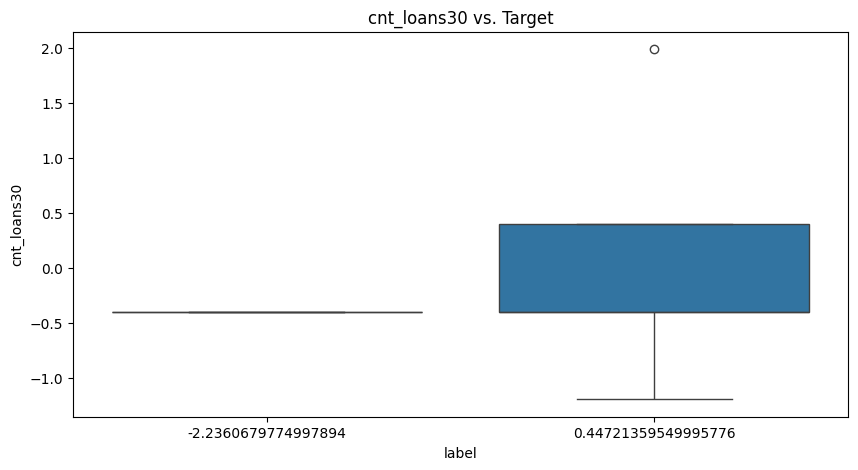

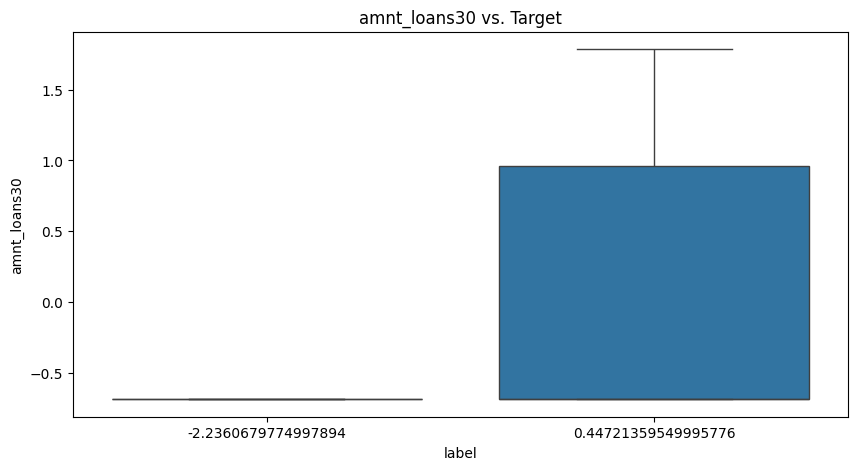

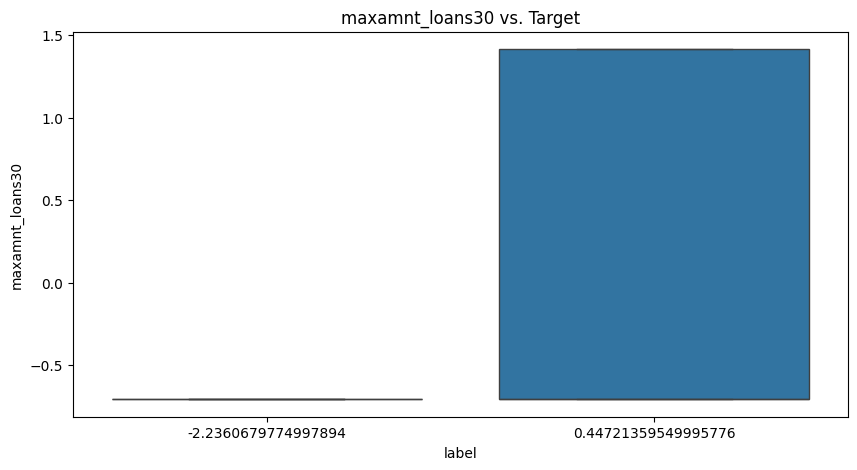

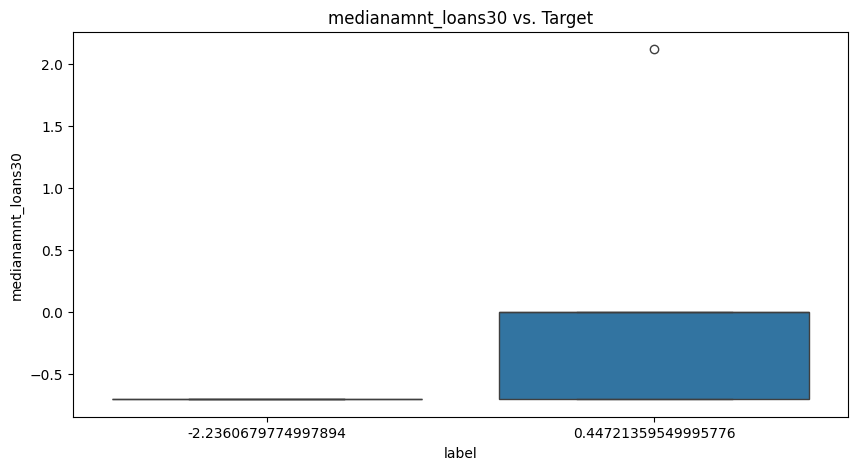

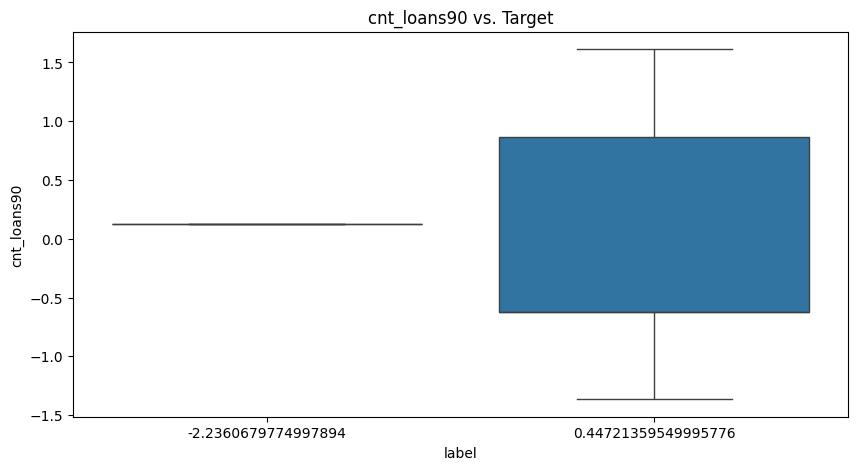

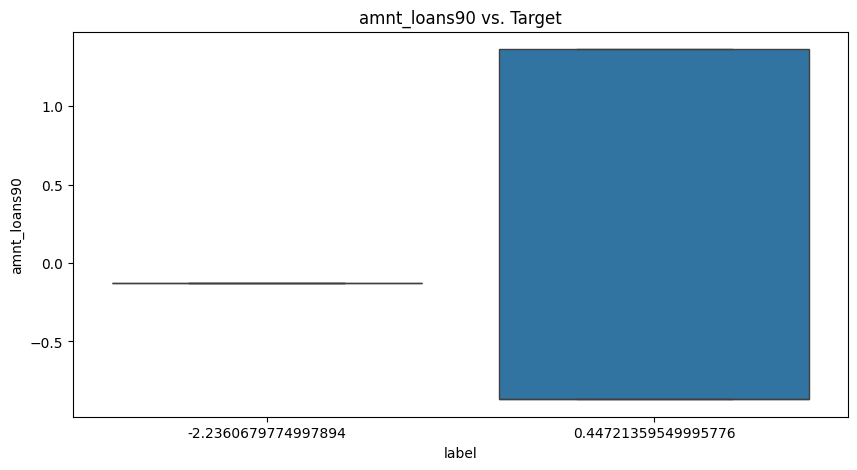

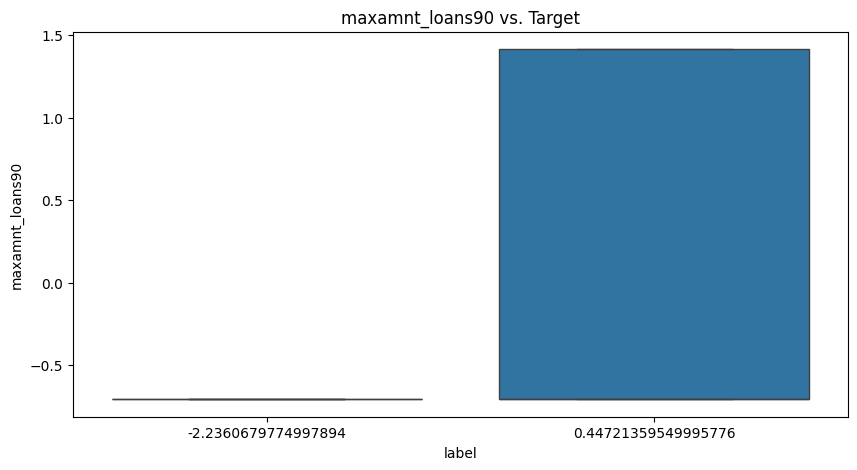

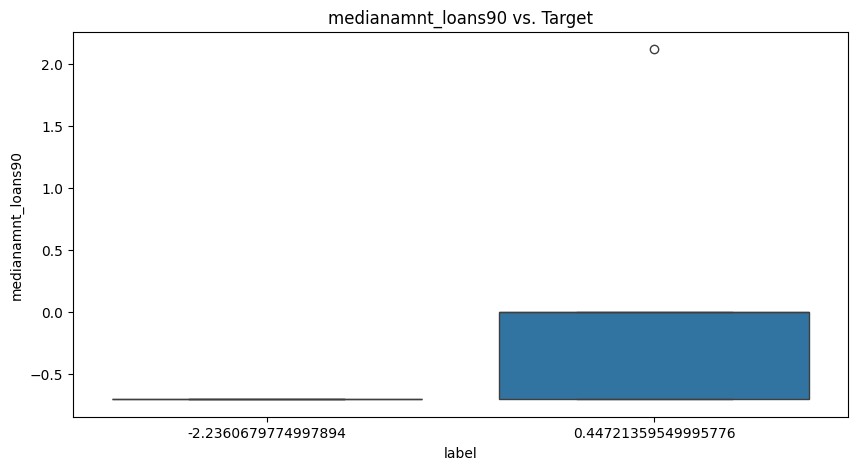

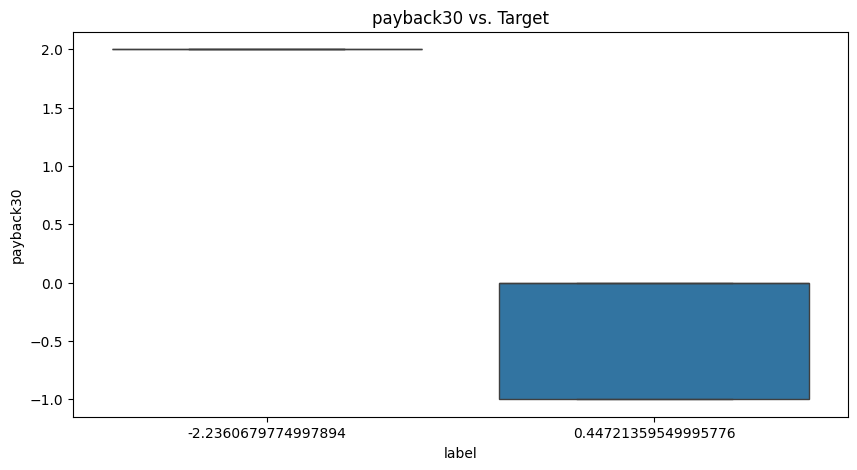

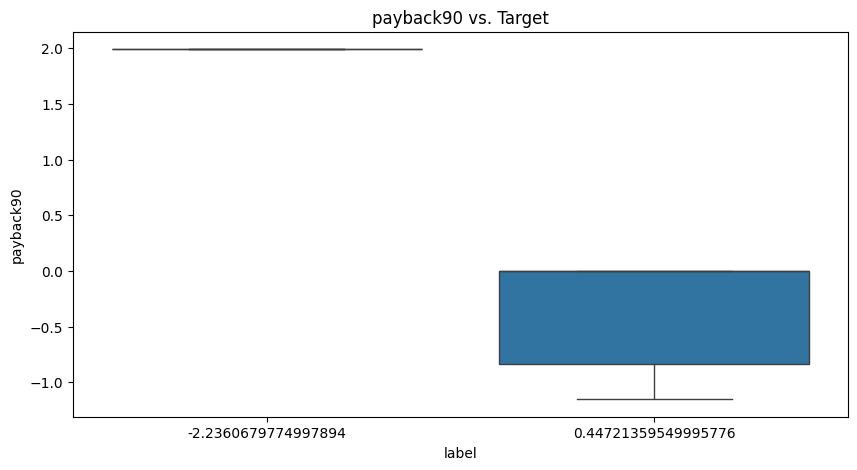

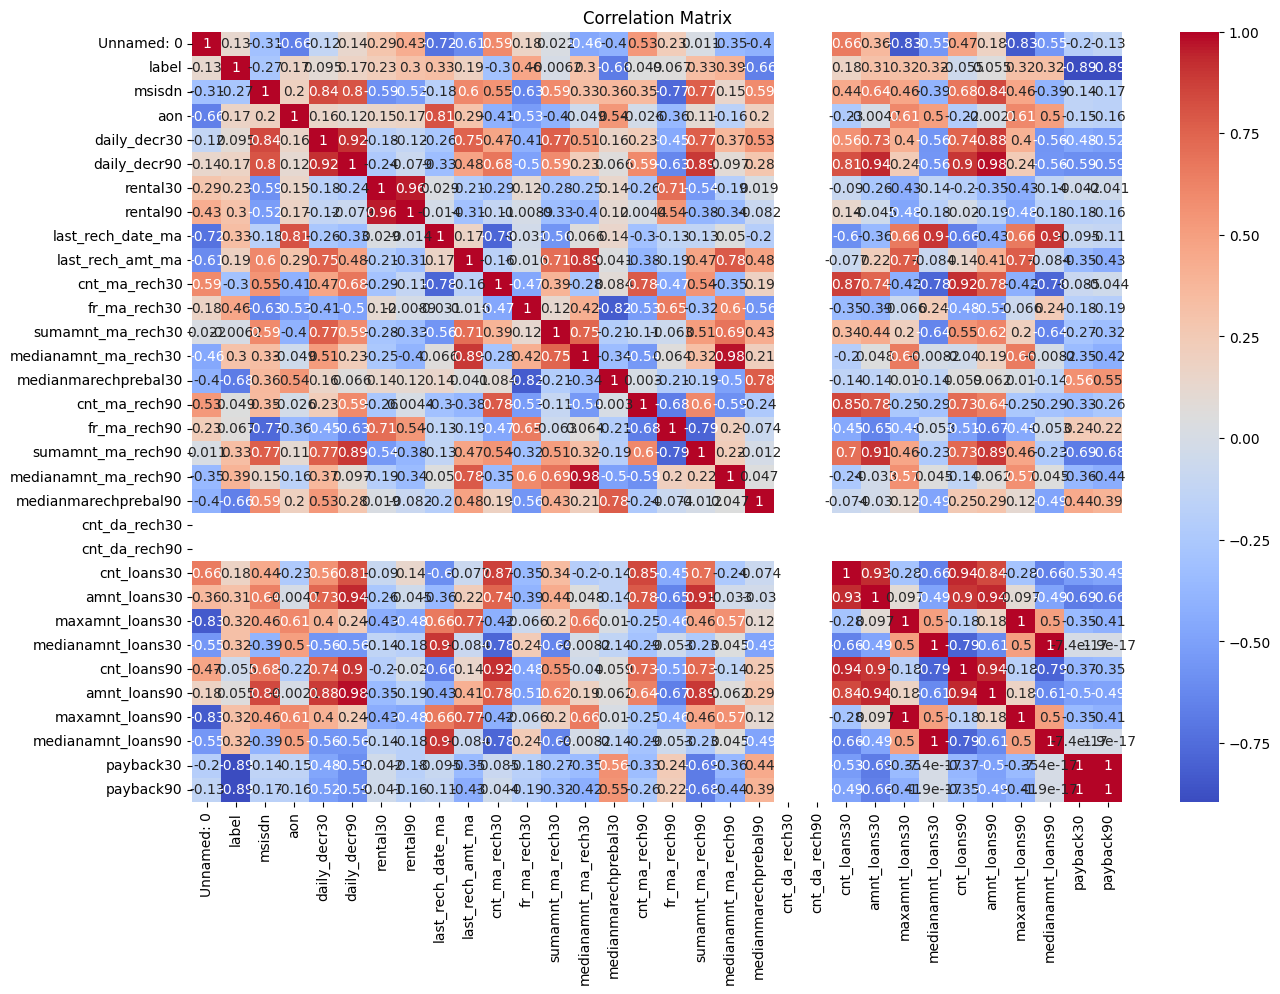

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure we have valid numerical columns
valid_num_cols = data_encoded[num_cols].dropna(axis=1, how='all').columns

# Bivariate analysis of numerical features with the target variable
for col in valid_num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=y, y=data_encoded[col].dropna())
    plt.title(f'{col} vs. Target')
    plt.show()

# Correlation matrix with valid numerical columns
plt.figure(figsize=(15, 10))
sns.heatmap(data_encoded[valid_num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**FEATURE ENGINEERING**

In [ ]:
# Example of creating new features
data_encoded['loan_to_income_ratio'] = data_encoded['amnt_loans30'] / (data_encoded['daily_decr30'] + 1)
data_encoded['historical_repayment_behavior'] = data_encoded['payback30'] / (data_encoded['cnt_loans30'] + 1)

# Display the first few rows of the data with new features
print(data_encoded.head())

   Unnamed: 0     label    msisdn       aon  daily_decr30  daily_decr90  \
0    -1.46385  0.447214 -0.225983  1.321511     -0.844750     -0.790745   
1    -0.87831  0.447214  1.534542  0.394737      1.988343      1.481885   
2    -0.29277 -2.236068  0.602356 -0.377575     -0.212181     -0.389607   
3     0.29277  0.447214 -1.238108  0.755149     -0.456922     -0.595016   
4     0.87831  0.447214 -1.194318 -1.819223     -0.932415     -0.999957   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0 -0.810068 -0.834618           1.991080                NaN  ...   
1 -0.403908 -0.519483          -0.113776                NaN  ...   
2 -0.508801 -0.670712          -0.739544                NaN  ...   
3  2.186558  2.103934           0.455104                NaN  ...   
4 -0.103073 -0.317074          -0.796432                NaN  ...   

   medianamnt_loans90  payback30  payback90  pdate_2016-07-13  \
0            2.121320        0.0   0.000000             False   
1         

**FEATURE SELECTION**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target dataframes respectively
# Example code to create X and y
# X = df.drop('label', axis=1)
# y = df['label']

# Split data into train and test sets (assuming you haven't done this already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the label data type
print("Label data type: ", y_train.dtype)

# Ensure labels are in binary format (0 or 1) and of integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Check for missing values in X_train
print(X_train.isnull().sum())

# Identify columns that are entirely NaN
cols_with_all_nan = X_train.columns[X_train.isna().all()].tolist()

# Drop columns that are entirely NaN before imputation
X_train_reduced = X_train.drop(columns=cols_with_all_nan)
X_test_reduced = X_test.drop(columns=cols_with_all_nan)

# Use an imputer to fill missing values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train_reduced)
X_test_imputed = imputer.transform(X_test_reduced)

# Ensure imputed data is a DataFrame and matches original columns
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_reduced.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test_reduced.columns)

# Feature selection using RFE
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_train_imputed, y_train)

# Display selected features
selected_features = X_train_reduced.columns[fit.support_]
print("Selected Features: ", selected_features)


Label data type:  float64
Unnamed: 0              0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       4
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            4
cnt_da_rech90           0
fr_da_rech90            4
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate_2016-07-13        0
pdate_2016-07-24        0
pdate_2016-07-30        0
pdate_2016-0

**MODEL TRAINING AND EVALUATION**

In [ ]:
# Check the distribution of the target variable in the training set
print("Training set distribution:")
print(y_train.value_counts())

# Check the distribution of the target variable in the test set
print("\nTest set distribution:")
print(y_test.value_counts())


Training set distribution:
label
 0    3
-2    1
Name: count, dtype: int64

Test set distribution:
label
0    2
Name: count, dtype: int64


In [ ]:
# Check unique values in y_train
unique_classes_train = np.unique(y_train)
print("Unique classes in y_train:", unique_classes_train)

# Check if there are unexpected class values and handle them
if set(unique_classes_train) != {0, 1}:
    # Handle unexpected class values, e.g., by removing or correcting them
    y_train = y_train[(y_train == 0) | (y_train == 1)]
    X_train = X_train.loc[y_train.index]
    print("After handling, unique classes in y_train:", np.unique(y_train))

# Print class distribution to check for imbalance
print("Class distribution in training data:")
print(y_train.value_counts())


Unique classes in y_train: [-2  0]
After handling, unique classes in y_train: [0]
Class distribution in training data:
label
0    3
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression  # (Optional: Remove if imbalance persists)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target dataframes respectively
# Example code to create X and y
# X = df.drop('label', axis=1)
# y = df['label']

# Split data into train and test sets (assuming you haven't done this already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the label data type
print("Label data type: ", y_train.dtype)

# Ensure labels are in binary format (0 or 1) and of integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Check for unexpected class values in y_train
unique_classes_train = np.unique(y_train)
print("Unique classes in y_train:", unique_classes_train)

# Check if there are unexpected class values and handle them
if set(unique_classes_train) != {0, 1}:
    # Handle unexpected class values, e.g., by removing or correcting them
    y_train = y_train[(y_train == 0) | (y_train == 1)]
    X_train = X_train.loc[y_train.index]
    print("After handling, unique classes in y_train:", np.unique(y_train))

# Check for missing values in X_train
print("Missing values in X_train:\n", X_train.isnull().sum())

# Identify columns that are entirely NaN
cols_with_all_nan = X_train.columns[X_train.isna().all()].tolist()

# Drop columns that are entirely NaN before imputation
X_train_reduced = X_train.drop(columns=cols_with_all_nan)
X_test_reduced = X_test.drop(columns=cols_with_all_nan)

# Use an imputer to fill missing values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train_reduced)
X_test_imputed = imputer.transform(X_test_reduced)

# Ensure imputed data is a DataFrame and matches original columns
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_reduced.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test_reduced.columns)

# Print class distribution to check for imbalance
# Print class distribution in training data
print("Class distribution in training data:", y_train.value_counts())



Label data type:  float64
Unique classes in y_train: [-2  0]
After handling, unique classes in y_train: [0]
Missing values in X_train:
 Unnamed: 0              0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       3
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            3
cnt_da_rech90           0
fr_da_rech90            3
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
paybac

**HYPERMETRIC TUNING**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Define the parameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_log_loss', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
